## Non-Einsteinian GW polarizations in the NANOGrav and CPTA data

We consider the binned correlations data by the NANOGrav and Chinese PTA to look for signatures of non-Einsteinian gravitational wave polarizations, i.e., subluminal tensors, vectors, and scalars beyond general relativity.

We consider the `PTAfast` code for producing the correlations and scan the correlations parameter space using the nested sampler `polychord` anchored in `cobaya`. We run the sampling in the terminal such as `mpirun -n NP cobaya-run ___.yaml` where NP is the number of processes and ____.yaml is the configuration file for the sampling. We use this notebook to study the results.

In [1]:
from getdist.mcsamples import loadMCSamples, MCSamples
import getdist
import getdist.plots as gdp
import os # requires *full path*

import re

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from scipy.special import legendre, spherical_jn

from PTAfast.hellingsdowns import HellingsDowns as HD
from PTAfast.tensor import Tensor
from PTAfast.vector import Vector
from PTAfast.scalar import ScalarL as SL
from PTAfast.scalar import ScalarT as ST

# likelihoods
from ng15correlationlikes import *
from cptacorrelationlikes import *
from ng15cptalikes import *

### 1 NG15/CPTA correlations data + HD + monopole

As a baseline we consider the binned correlations data that show the Hellings-Downs correlation.

chi^2 values at NG15
HD chi^2 = 0.6372825750238664
Mon chi^2 = 3.277602466580506

chi^2 values at CPTA
HD chi^2 = 1.288519094914837
Mon chi^2 = 19.59732150691961

chi^2 values at NG15 + CPTA
HD chi^2 = 0.9396423878303884
Mon chi^2 = 10.854614878166519



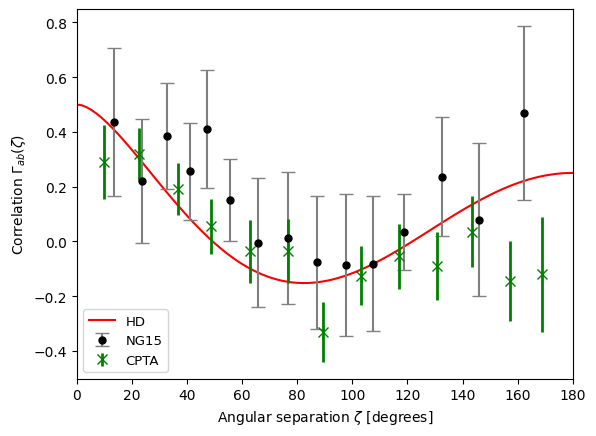

In [2]:
# import binned correlations data
ng15 = np.array([[ 1.33750e+01,  4.35000e-01,  2.70000e-01], \
                 [ 2.37500e+01,  2.20000e-01,  2.27000e-01], \
                 [ 3.28125e+01,  3.85000e-01,  1.93000e-01], \
                 [ 4.12500e+01,  2.57000e-01,  1.77000e-01], \
                 [ 4.72500e+01,  4.10000e-01,  2.15000e-01], \
                 [ 5.56250e+01,  1.50000e-01,  1.50000e-01], \
                 [ 6.57500e+01, -5.00000e-03,  2.35000e-01], \
                 [ 7.66250e+01,  1.20000e-02,  2.41000e-01], \
                 [ 8.70000e+01, -7.60000e-02,  2.42000e-01], \
                 [ 9.78750e+01, -8.50000e-02,  2.60000e-01], \
                 [ 1.07500e+02, -8.10000e-02,  2.47000e-01], \
                 [ 1.18750e+02,  3.50000e-02,  1.40000e-01], \
                 [ 1.32500e+02,  2.37000e-01,  2.18000e-01], \
                 [ 1.45875e+02,  8.00000e-02,  2.80000e-01], \
                 [ 1.62375e+02,  4.70000e-01,  3.17000e-01]])

# cross correlations
zab_Deg = ng15[:, 0] # degrees
zab = zab_Deg*np.pi/180
Gab_NG15 = ng15[:, 1]
DGab_NG15 = ng15[:, 2]

cpta = np.array([[ 9.700e+00,  2.900e-01,  1.350e-01], \
                 [ 2.270e+01,  3.200e-01,  9.500e-02], \
                 [ 3.670e+01,  1.900e-01,  9.500e-02], \
                 [ 4.880e+01,  5.500e-02,  1.000e-01], \
                 [ 6.290e+01, -3.500e-02,  1.150e-01], \
                 [ 7.650e+01, -3.500e-02,  1.160e-01], \
                 [ 8.950e+01, -3.300e-01,  1.100e-01], \
                 [ 1.030e+02, -1.250e-01,  1.080e-01], \
                 [ 1.170e+02, -5.500e-02,  1.200e-01], \
                 [ 1.307e+02, -9.000e-02,  1.250e-01], \
                 [ 1.433e+02,  3.500e-02,  1.300e-01], \
                 [ 1.572e+02, -1.450e-01,  1.450e-01], \
                 [ 1.690e+02, -1.200e-01,  2.100e-01]])

# cross correlations
Zab_Deg = cpta[:, 0] # degrees
Zab = Zab_Deg*np.pi/180
Gab_cpta = cpta[:, 1]
DGab_cpta = cpta[:, 2]

# compute and print likelihood (chi^2) of both monopole and HD
hd = HD(lm = 60)
Gab_hdAtNG15 = hd.get_ORF(zab)
chi2_HDAtNG15 = sum(((Gab_hdAtNG15['ORF'] - Gab_NG15)/DGab_NG15)**2)/len(zab)

Gab_hdAtCPTA = hd.get_ORF(Zab)
chi2_HDAtCPTA = sum(((Gab_hdAtCPTA['ORF'] - Gab_cpta)/DGab_cpta)**2)/len(Zab)

# monopole
chi2_MonAtNG15 = sum(((0.5- Gab_NG15)/DGab_NG15)**2)/len(zab)
chi2_MonAtCPTA = sum(((0.5- Gab_cpta)/DGab_cpta)**2)/len(Zab)

print('chi^2 values at NG15')
print('HD chi^2 =', chi2_HDAtNG15)
print('Mon chi^2 =', chi2_MonAtNG15)
print()

print('chi^2 values at CPTA')
print('HD chi^2 =', chi2_HDAtCPTA)
print('Mon chi^2 =', chi2_MonAtCPTA)
print()

print('chi^2 values at NG15 + CPTA')
print('HD chi^2 =', (chi2_HDAtNG15*len(zab) + chi2_HDAtCPTA*len(Zab))/(len(zab) + len(Zab)))
print('Mon chi^2 =', (chi2_MonAtNG15*len(zab) + chi2_MonAtCPTA*len(Zab))/(len(zab) + len(Zab)))
print()

# visualize points
fig, ax = plt.subplots()
ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
            label = 'NG15', zorder = 10, \
            fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)

ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
            label = 'CPTA', zorder = 10, \
            fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)

# with cosmic variance
zta = np.linspace(0, np.pi, 100)
hdcurve = HD(lm = 60).get_ORF(zta)['ORF']
ax.plot(zta*180/np.pi, hdcurve, 'r-', label = 'HD')
# ax.plot(zta*180/np.pi, [0.5]*len(zta), 'b--', label = 'mon')

ax.set_xlim(0, 180)
ax.set_xlabel(r'Angular separation $\zeta$ [degrees]')
ax.set_ylabel(r'Correlation $\Gamma_{ab}(\zeta)$')
ax.legend(loc = 'lower left', prop = {'size': 9.5})
plt.show()

This shows the HD. But particularly this shows that the monopole to be disfavored by the data compared with the previously less stringent 12 1/2 years NG counterpart. The error bars remain larger than the cosmic variance, which gives an opportunity to look at the signature of other modes with this present observation.

Before we go to the interesting part, here is the best fit obtained with a Gaussian random noise, which we consider as the null hypothesis or an uncorrelated process.

/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/ucgrn0_NG15.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/ucgrn0_cpta.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/ucgrn0_joint.1.txt
Removed no burn in


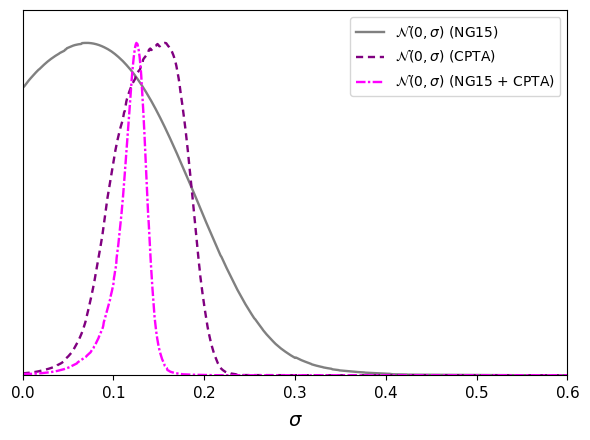

In [3]:
gds_ucGRN0 = loadMCSamples(os.path.abspath('polyc/ucgrn0_NG15'));
gds_ucGRN0_cpta = loadMCSamples(os.path.abspath('polyc/ucgrn0_cpta'));
gds_ucGRN0_joint = loadMCSamples(os.path.abspath('polyc/ucgrn0_joint'));

# plot best fit Gaussian random noise with zero mean
gdplot = gdp.get_single_plotter()
gdplot.plot_1d([gds_ucGRN0, gds_ucGRN0_cpta, gds_ucGRN0_joint],
               'sigma',  # Parameter name should be a string, not a list
               colors=['gray', 'purple', 'magenta'],
               ls=['-', '--', '-.'],
               lw=[1.3, 1.3, 1.3],
               param_limits={'sigma': (0, 0.5)})

# Manually add the legend to the plot
legend_labels = [r'${\cal N}(0, \sigma)$ (NG15)',
                 r'${\cal N}(0, \sigma)$ (CPTA)',
                 r'${\cal N}(0, \sigma)$ (NG15 + CPTA)']
plt.legend(legend_labels, loc='upper right')
plt.xlim(0, 0.6)
plt.show()

The Bayesian evidences for these results are printed in the next line.

In [4]:
# Specify the path to the file

def PrintLogZs(fff):
    for each in fff:
        ff_polyraw = 'polyc/' + each + '_polychord_raw/' + each + '.stats'
        
        # marge stats
        margestats = loadMCSamples(os.path.abspath('polyc/' + each)).getMargeStats();

        # Define the regular expression pattern to match the log(Z) values and errors
        pattern = r"log\(Z\)\s+=\s+(-?\d+\.\d+E[+-]\d+)\s+\+/-\s+(-?\d+\.\d+E[+-]\d+)"

        # Read the file
        with open(ff_polyraw, 'r') as file:
            content = file.read()

        # Extract log(Z) values and errors using regular expressions
        matches = re.findall(pattern, content)

        # Extract the individual log(Z) values and errors
        log_z_values = [float(match[0]) for match in matches]
        log_z_errors = [float(match[1]) for match in matches]

        # Print the extracted log(Z) values and errors
        print(each)
        for log_z, log_z_err in zip(log_z_values, log_z_errors):
            print(f"log(Z) = {log_z} +/- {log_z_err}")
        print('best chi2 =', margestats.parWithName('chi2').bestfit_sample)
        print()

ff = ['ucgrn0_NG15', 'ucgrn0_cpta', 'ucgrn0_joint']
PrintLogZs(ff)

ucgrn0_NG15
log(Z) = -10.5839316030768 +/- 0.113023824675914
best chi2 = 6.6181691

ucgrn0_cpta
log(Z) = -14.0057323125759 +/- 0.186522840409259
best chi2 = 3.6002083

ucgrn0_joint
log(Z) = -23.0882724612198 +/- 0.297067662560859
best chi2 = 20.33144



Finally we discuss the results for NE GW polarizations.

### 2 Subluminal GWs: Tensors

We start with the most natural alternative. Since the correlations strongly manifest a quadrupolar shape, we consider subluminal GW correlations as an alternative to the HD. We import the results of the sampling below.

In [5]:
ff1 = 'polyc/T_NG15'
ff2 = 'polyc/T_NG15CV' # with cosmic variance
ff1_cpta = 'polyc/T_cpta'
ff2_cpta = 'polyc/T_cptaCV' # with cosmic variance
ff1_joint = 'polyc/T_joint'
ff2_joint = 'polyc/T_jointCV' # with cosmic variance

gdsamps1 = loadMCSamples(os.path.abspath(ff1));
gdsamps2 = loadMCSamples(os.path.abspath(ff2));
gdsamps1_cpta = loadMCSamples(os.path.abspath(ff1_cpta));
gdsamps2_cpta = loadMCSamples(os.path.abspath(ff2_cpta));
gdsamps1_joint = loadMCSamples(os.path.abspath(ff1_joint));
gdsamps2_joint = loadMCSamples(os.path.abspath(ff2_joint));

stats1 = gdsamps1.getMargeStats();
stats2 = gdsamps2.getMargeStats();
stats1_cpta = gdsamps1_cpta.getMargeStats();
stats2_cpta = gdsamps2_cpta.getMargeStats();
stats1_joint = gdsamps1_joint.getMargeStats();
stats2_joint = gdsamps2_joint.getMargeStats();

/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/T_NG15.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/T_NG15CV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/T_cpta.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/T_cptaCV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/T_joint.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/T_jointCV.1.txt
Removed no burn in


Now it would be illustrative to take a look at the results in a triangle plot. Here is is for the subluminal GW tensors with the chi-squared values.

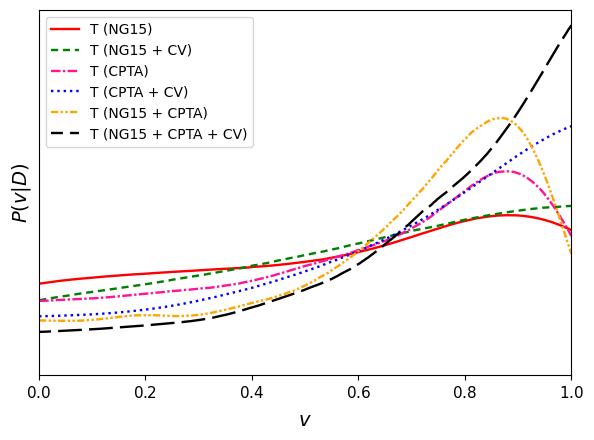

T_NG15
log(B) = log(Z/Z_up) = 5.69914887461352 +/- 0.11781687570939499
best chi2 = 8.1658556

T_NG15CV
log(B) = log(Z/Z_up) = 6.0334965200314405 +/- 0.11814122379909514
best chi2 = 8.4204803

T_cpta
log(B) = log(Z/Z_up) = 6.06967145360436 +/- 0.1950310099515023
best chi2 = 13.421191

T_cptaCV
log(B) = log(Z/Z_up) = 8.79353867990619 +/- 0.19743410034224831
best chi2 = 9.0510135

T_joint
log(B) = log(Z/Z_up) = 10.347488956566599 +/- 0.3099717745811716
best chi2 = 23.969115

T_jointCV
log(B) = log(Z/Z_up) = 13.409169634013878 +/- 0.3131943847765293
best chi2 = 17.485385



In [6]:
gdplot = gdp.get_single_plotter()
gdplot.plot_1d([gdsamps1, gdsamps2, gdsamps1_cpta, gdsamps2_cpta, \
                gdsamps1_joint, gdsamps2_joint], \
               "v", normalized = True, \
               ls = ['-', '--', '-.', ':', \
                     (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))], \
               lw = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3], \
               colors = ['red', 'green', 'deeppink', 'blue', \
                         'orange', 'black'])

legend_labels = ['T (NG15)', 'T (NG15 + CV)', \
                 'T (CPTA)', 'T (CPTA + CV)', \
                 'T (NG15 + CPTA)', 'T (NG15 + CPTA + CV)']
plt.legend(legend_labels, loc='upper left')
plt.xlim(0, 1)
plt.ylabel(r'$P(v|D)$')
plt.show()

def PrintLogBs(fff, D):
    for each in fff:
        ff_polyraw = 'polyc/' + each + '_polychord_raw/' + each + '.stats'
        
        if D == 'NG15':
            logZ_up, logZ_up_err = (-10.5839316030768, 0.113023824675914)
        if D == 'CPTA':
            logZ_up, logZ_up_err = (-14.0057323125759, 0.186522840409259)
        if D == 'joint':
            logZ_up, logZ_up_err = (-23.0882724612198, 0.297067662560859)
             
        # marge stats
        margestats = loadMCSamples(os.path.abspath('polyc/' + each)).getMargeStats();

        # Define the regular expression pattern to match the log(Z) values and errors
        pattern = r"log\(Z\)\s+=\s+(-?\d+\.\d+E[+-]\d+)\s+\+/-\s+(-?\d+\.\d+E[+-]\d+)"

        # Read the file
        with open(ff_polyraw, 'r') as file:
            content = file.read()

        # Extract log(Z) values and errors using regular expressions
        matches = re.findall(pattern, content)

        # Extract the individual log(Z) values and errors
        log_z_values = [float(match[0]) for match in matches]
        log_z_errors = [float(match[1]) for match in matches]

        # Print the extracted log(Z) values and errors
        print(each)
        for log_z, log_z_err in zip(log_z_values, log_z_errors):
            print(f"log(B) = log(Z/Z_up) = {log_z - logZ_up} +/- {log_z_err + logZ_up_err}")
        print('best chi2 =', margestats.parWithName('chi2').bestfit_sample)
        print()

# print out Bayesian evidences
PrintLogBs(['T_NG15', 'T_NG15CV'], 'NG15')
PrintLogBs(['T_cpta', 'T_cptaCV'], 'CPTA')
PrintLogBs(['T_joint', 'T_jointCV'], 'joint')

Alternatively we can look at the constraints simultaneous for the GW speed and the graviton mass in a 2D plot.

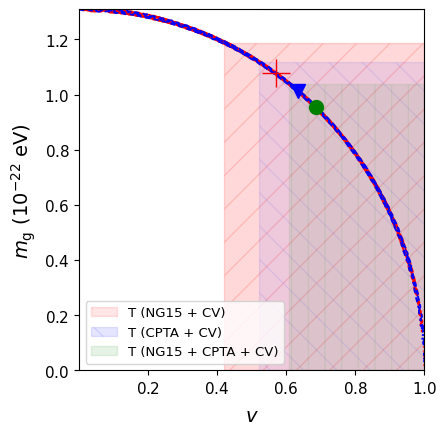

In [7]:
g = gdp.get_subplot_plotter(width_inch = 4.5)
g.plot_2d([gdsamps2, gdsamps2_cpta], ['v', 'm_g'], \
          colors = ['red', 'blue'], ls = ['-', '--'])

# tensor + CV stats NG15
plt.plot(stats2.parWithName('v').mean, m_g(stats2.parWithName('v').mean), \
         'r+', markersize = 20)
plt.axvspan(stats2.parWithName('v').limits[0].lower, \
            stats2.parWithName('v').limits[0].upper, \
            ymin = m_g(stats2.parWithName('v').limits[0].lower), \
            alpha = 0.1, color = 'red', hatch = '/', label = 'T (NG15 + CV)')
plt.fill_between(np.linspace(stats2.parWithName('v').limits[0].lower, \
                             stats2.parWithName('v').limits[0].upper, 50), \
                 [m_g(stats2.parWithName('v').limits[0].lower)]*50, \
                 [m_g(stats2.parWithName('v').limits[0].upper)]*50, \
                 alpha = 0.15, color = 'red', hatch = '/')

# tensor + CV stats CPTA
plt.plot(stats2_cpta.parWithName('v').mean, m_g(stats2_cpta.parWithName('v').mean), \
         'bv', markersize = 10)
plt.axvspan(stats2_cpta.parWithName('v').limits[0].lower, \
            stats2_cpta.parWithName('v').limits[0].upper, \
            ymin = m_g(stats2_cpta.parWithName('v').limits[0].lower), \
            alpha = 0.1, color = 'blue', hatch = '\\', label = 'T (CPTA + CV)')
plt.fill_between(np.linspace(stats2_cpta.parWithName('v').limits[0].lower, \
                             stats2_cpta.parWithName('v').limits[0].upper, 50), \
                 [m_g(stats2_cpta.parWithName('v').limits[0].lower)]*50, \
                 [m_g(stats2_cpta.parWithName('v').limits[0].upper)]*50, \
                 alpha = 0.07, color = 'blue', hatch = '\\')

# tensor + NG15 + CPTA
plt.plot(stats2_joint.parWithName('v').mean, m_g(stats2_joint.parWithName('v').mean), \
         'go', markersize = 10)
plt.axvspan(stats2_joint.parWithName('v').limits[0].lower, \
            stats2_joint.parWithName('v').limits[0].upper, \
            ymin = m_g(stats2_joint.parWithName('v').limits[0].lower), \
            alpha = 0.1, color = 'green', hatch = '-', label = 'T (NG15 + CPTA + CV)')
plt.fill_between(np.linspace(stats2_joint.parWithName('v').limits[0].lower, \
                             stats2_joint.parWithName('v').limits[0].upper, 50), \
                 [m_g(stats2_joint.parWithName('v').limits[0].lower)]*50, \
                 [m_g(stats2_joint.parWithName('v').limits[0].upper)]*50, \
                 alpha = 0.07, color = 'green', hatch = '|')

plt.legend(loc = 'lower left', prop = {'size': 9.5})
plt.ylim(0, top=m_g(0))
plt.ylabel(r'$m_{\rm g}$ ($10^{-22}$ eV)')
plt.show()

We plot the best fit correlations together with the data set to further have insight how good the fitting is. The result is shown below.

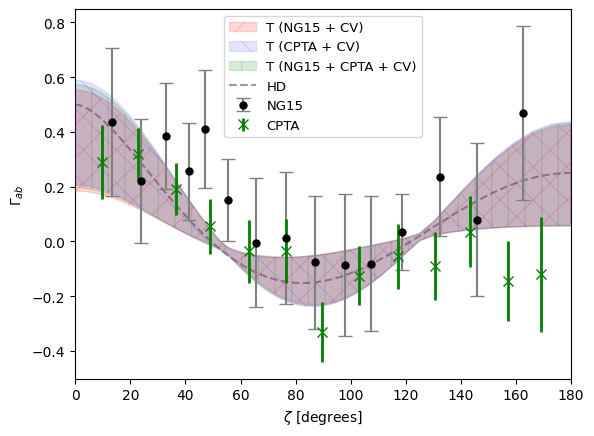

In [8]:
# mean ORFs for tensor and vector
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)
TensorBForf = Tensor(lm = 10, v = stats2.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
Gab_TensorBF = TensorBForf['ORF']
Gab_TensorCV = np.sqrt(TensorBForf['CV'])

TensorBForf_cpta = Tensor(lm = 10, v = stats2_cpta.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
Gab_TensorBF_cpta = TensorBForf_cpta['ORF']
Gab_TensorCV_cpta = np.sqrt(TensorBForf_cpta['CV'])

TensorBForf_joint = Tensor(lm = 10, v = stats2_joint.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
Gab_TensorBF_joint = TensorBForf_joint['ORF']
Gab_TensorCV_joint = np.sqrt(TensorBForf_joint['CV'])

# plot best fits
fig, ax = plt.subplots()
ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
            label = 'NG15', zorder = 10, \
            fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)

ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
            label = 'CPTA', zorder = 10, \
            fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)

# generic 2*sigma plotter for correlations
def correlations_plot(zz, Gab_zz, lbl = 0, DGab_zz = 0, clr = 'red', hch = '/', \
                      alf = 0.15, afrac = 2, zo = 9):
    if lbl == 0:
        ax.fill_between(zz*180/np.pi, Gab_zz - DGab_zz, Gab_zz + DGab_zz, \
                        facecolor = clr, edgecolor = clr, \
                        alpha = alf, hatch = hch, zorder = zo, rasterized = True)
        ax.fill_between(zz*180/np.pi, Gab_zz - 2*DGab_zz, Gab_zz + 2*DGab_zz, \
                        facecolor = clr, edgecolor = clr, \
                        alpha = alf/afrac, hatch = hch, zorder = zo, rasterized = True)    
    else:
        ax.fill_between(zz*180/np.pi, Gab_zz - DGab_zz, Gab_zz + DGab_zz, \
                        facecolor = clr, edgecolor = clr, \
                        alpha = alf, hatch = hch, label = lbl, zorder = zo, rasterized = True)
        ax.fill_between(zz*180/np.pi, Gab_zz - 2*DGab_zz, Gab_zz + 2*DGab_zz, \
                        facecolor = clr, edgecolor = clr, \
                        alpha = alf/afrac, hatch = hch, zorder = zo, rasterized = True)    

# tensor (NG15 + CV)
correlations_plot(Zeta, Gab_TensorBF, DGab_zz = Gab_TensorCV, lbl = r'T (NG15 + CV)', afrac = 100)

# tensor (CPTA + CV)
correlations_plot(Zeta, Gab_TensorBF_cpta, DGab_zz = Gab_TensorCV_cpta, lbl = r'T (CPTA + CV)', \
                  clr = 'blue', hch = '\\', alf = 0.10, afrac = 100)

# tensor (NG15 + CPTA + CV)
correlations_plot(Zeta, Gab_TensorBF_joint, DGab_zz = Gab_TensorCV_joint, lbl = r'T (NG15 + CPTA + CV)', \
                  clr = 'green', hch = '|', zo = 0, afrac = 100)

# HD curve
ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8, label = 'HD')

ax.set_xlim(0, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$\Gamma_{ab}$')
ax.legend(loc = 'upper center', prop = {'size': 9.5})
plt.show()

To end, below we plot the constraints individually without overlapping them.

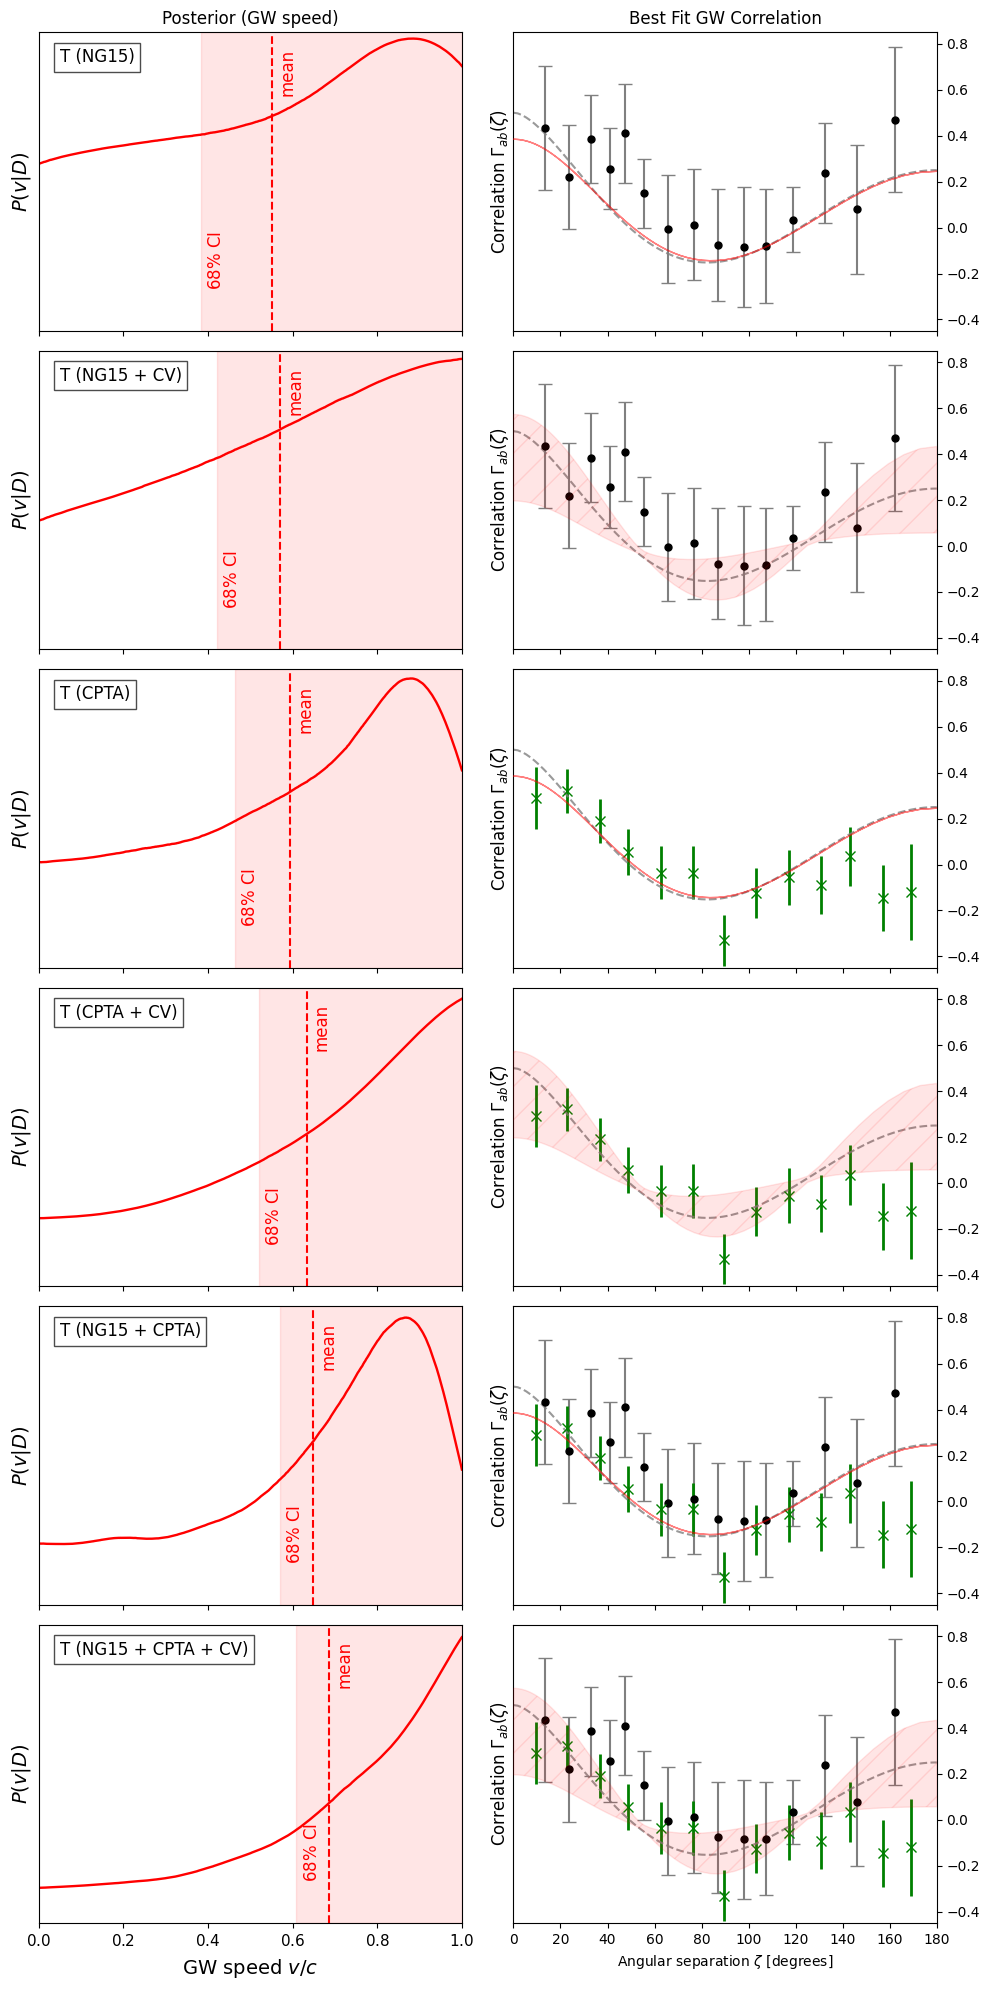

<Figure size 600x450 with 0 Axes>

In [9]:
# Create a figure and axes with 2 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 20), sharex='col')

# Hide x-axis labels for all but the bottom plot in the left column
for ax in axes[:-1, 0]:
    plt.setp(ax.get_xticklabels(), visible=False)

# Define the posterior plots (using placeholder axes for now)
gdplot = gdp.get_single_plotter()

posterior_plots = [gdsamps1, gdsamps2, gdsamps1_cpta, gdsamps2_cpta, \
                   gdsamps1_joint, gdsamps2_joint]
stats = [stats1, stats2, stats1_cpta, stats2_cpta, stats1_joint, stats2_joint]
legend_labels = ['T (NG15)', 'T (NG15 + CV)', 'T (CPTA)', 'T (CPTA + CV)', \
                 'T (NG15 + CPTA)', 'T (NG15 + CPTA + CV)']

# Plot each posterior plot on its corresponding axis in the left column
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 0]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='v', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('v').limits[0].lower, \
               statsi.parWithName('v').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.text(statsi.parWithName('v').limits[0].lower + 0.015, 0.15, r'$68\%$ CI', \
            fontsize=12, color='red', rotation=90, transform=ax.transAxes)
    ax.axvline(statsi.parWithName('v').mean, color = 'red', ls = '--')
    ax.text(statsi.parWithName('v').mean + 0.015, 0.8, r'mean', \
            fontsize=12, color='red', rotation=90, transform=ax.transAxes)
    ax.set_xlabel(None)
    ax.set_ylabel(r'$P(v|D)$')
    ax.set_xlim(0, 1)
    ax.text(0.05, 0.90, legend_labels[i], fontsize=12, \
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))

for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 1]  # Left column, same row as posterior plot index
    if i in [0, 1]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
    if i in [2, 3]:
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    if i in [4, 5]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
        
    BForf = Tensor(lm = 10, v = statsi.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
    if i in [0, 2, 4]:
        correlations_plot(Zeta, BForf['ORF'], alf = 0.5, afrac = 100)
    elif i in [1, 3, 5]:
        correlations_plot(Zeta, BForf['ORF'], DGab_zz = np.sqrt(BForf['CV']), alf = 0.1, afrac = 100)
        
    ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8) # HD curve
    ax.set_xlim(0, 180)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("left")
    ax.yaxis.label.set_rotation(90)

    # Set the y-axis label on the right side
    ax.set_ylabel(r'Correlation $\Gamma_{ab}(\zeta)$')
    ax.yaxis.set_label_coords(-0.005, 0.5)
    ax.yaxis.label.set_size(12)
    ax.set_ylim(-0.45, 0.85)
    
# Add x-axis labels to the bottom plot in the left column
axes[-1, 0].set_xlabel(r'GW speed $v/c$')
axes[-1, 1].set_xlabel(r'Angular separation $\zeta$ [degrees]')  # right column

axes[0, 0].set_title(r'Posterior (GW speed)')
axes[0, 1].set_title(r'Best Fit GW Correlation')

# Manually adjust the height of the figure to reduce spacing between rows
fig.subplots_adjust(hspace=0, wspace=0.00)  # Then manually set the desired spacing between rows

fig.tight_layout()
plt.show()

### 3 Subluminal GWs: Vectors

Let's see it for vector GW correlations that also manifest a quadrupole. We import the results of the sampling in the next code block.

In [10]:
ff3 = 'polyc/V_NG15'
ff4 = 'polyc/V_NG15CV' # with cosmic variance
ff3_cpta = 'polyc/V_cpta'
ff4_cpta = 'polyc/V_cptaCV' # with cosmic variance
ff3_joint = 'polyc/V_joint'
ff4_joint = 'polyc/V_jointCV' # with cosmic variance


gdsamps3 = loadMCSamples(os.path.abspath(ff3));
gdsamps4 = loadMCSamples(os.path.abspath(ff4));
gdsamps3_cpta = loadMCSamples(os.path.abspath(ff3_cpta));
gdsamps4_cpta = loadMCSamples(os.path.abspath(ff4_cpta));
gdsamps3_joint = loadMCSamples(os.path.abspath(ff3_joint));
gdsamps4_joint = loadMCSamples(os.path.abspath(ff4_joint));

stats3 = gdsamps3.getMargeStats();
stats4 = gdsamps4.getMargeStats();
stats3_cpta = gdsamps3_cpta.getMargeStats();
stats4_cpta = gdsamps4_cpta.getMargeStats();
stats3_joint = gdsamps3_joint.getMargeStats();
stats4_joint = gdsamps4_joint.getMargeStats();

/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/V_NG15.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/V_NG15CV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/V_cpta.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/V_cptaCV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/V_joint.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/V_jointCV.1.txt
Removed no burn in


Then below we show the triangle plot 1d and 2d posteriors for the vector GW speed and the corresponding graviton mass. We also print the corresponding Bayesian evidences.

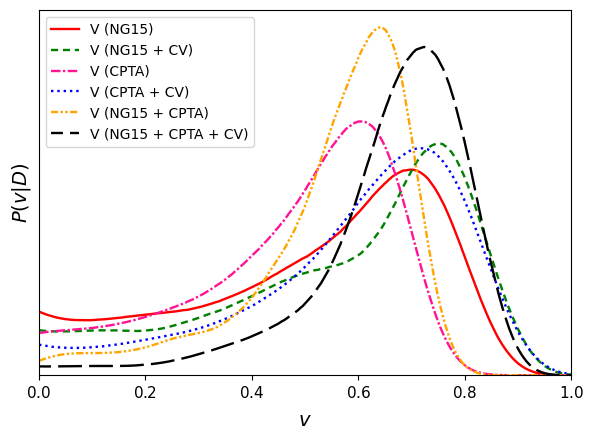

V_NG15
log(B) = log(Z/Z_up) = 6.0030386182468805 +/- 0.1280551587700843
best chi2 = 7.4960911

V_NG15CV
log(B) = log(Z/Z_up) = 6.511048144898921 +/- 0.1268331014102198
best chi2 = 6.6341128

V_cpta
log(B) = log(Z/Z_up) = 6.276885635482509 +/- 0.2057315774656768
best chi2 = 13.463696

V_cptaCV
log(B) = log(Z/Z_up) = 9.40937124444202 +/- 0.2043633167037828
best chi2 = 7.2842985

V_joint
log(B) = log(Z/Z_up) = 11.081368964016598 +/- 0.3238214184755987
best chi2 = 21.330161

V_jointCV
log(B) = log(Z/Z_up) = 14.789095310643459 +/- 0.3234258522908456
best chi2 = 13.983079



In [11]:
gdplot = gdp.get_single_plotter()
gdplot.plot_1d([gdsamps3, gdsamps4, gdsamps3_cpta, gdsamps4_cpta, \
                gdsamps3_joint, gdsamps4_joint], \
               "v", normalized = True, \
               ls = ['-', '--', '-.', ':', \
                     (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))], \
               lw = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3], \
               colors = ['red', 'green', 'deeppink', 'blue', \
                         'orange', 'black'])
legend_labels = ['V (NG15)', 'V (NG15 + CV)', \
                 'V (CPTA)', 'V (CPTA + CV)', \
                 'V (NG15 + CPTA)', 'V (NG15 + CPTA + CV)']
plt.legend(legend_labels, loc='upper left')
plt.xlim(0, 1)
plt.ylabel(r'$P(v|D)$')
plt.show()

# print out Bayesian evidences
PrintLogBs(['V_NG15', 'V_NG15CV'], 'NG15')
PrintLogBs(['V_cpta', 'V_cptaCV'], 'CPTA')
PrintLogBs(['V_joint', 'V_jointCV'], 'joint')

Then as we did with the tensors we show a 2d plot of the GW speed and the graviton. This also shows the 68\% confidence bounds.

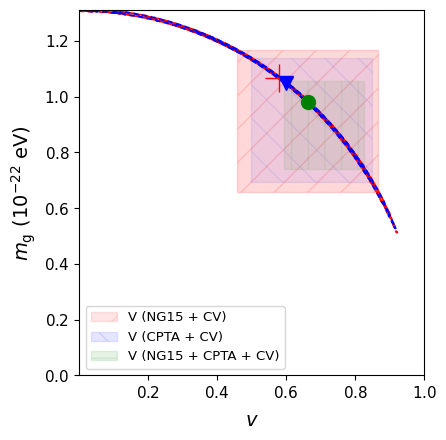

In [12]:
g = gdp.get_subplot_plotter(width_inch = 4.5)
g.plot_2d([gdsamps4, gdsamps4_cpta], ['v', 'm_g'], \
          colors = ['red', 'blue'], ls = ['-', '--'])

# V (NG15 + CV)
plt.plot(stats4.parWithName('v').mean, m_g(stats4.parWithName('v').mean), \
         'r+', markersize = 20)
plt.axvspan(stats4.parWithName('v').limits[0].lower, \
            stats4.parWithName('v').limits[0].upper, \
            ymin = m_g(stats4.parWithName('v').limits[0].lower), \
            alpha = 0.1, color = 'red', hatch = '/', label = 'V (NG15 + CV)')
plt.fill_between(np.linspace(stats4.parWithName('v').limits[0].lower, \
                             stats4.parWithName('v').limits[0].upper, 50), \
                 [m_g(stats4.parWithName('v').limits[0].lower)]*50, \
                 [m_g(stats4.parWithName('v').limits[0].upper)]*50, \
                 alpha = 0.15, color = 'red', hatch = '/')

# V (CPTA + CV)
plt.plot(stats4_cpta.parWithName('v').mean, m_g(stats4_cpta.parWithName('v').mean), \
         'bv', markersize = 10)
plt.axvspan(stats4_cpta.parWithName('v').limits[0].lower, \
            stats4_cpta.parWithName('v').limits[0].upper, \
            ymin = m_g(stats4_cpta.parWithName('v').limits[0].lower), \
            alpha = 0.1, color = 'blue', hatch = '\\', label = 'V (CPTA + CV)')
plt.fill_between(np.linspace(stats4_cpta.parWithName('v').limits[0].lower, \
                             stats4_cpta.parWithName('v').limits[0].upper, 50), \
                 [m_g(stats4_cpta.parWithName('v').limits[0].lower)]*50, \
                 [m_g(stats4_cpta.parWithName('v').limits[0].upper)]*50, \
                 alpha = 0.07, color = 'blue', hatch = '\\')

# V (NG15 + CPTA + CV)
plt.plot(stats4_joint.parWithName('v').mean, m_g(stats4_joint.parWithName('v').mean), \
         'go', markersize = 10)
plt.axvspan(stats4_joint.parWithName('v').limits[0].lower, \
            stats4_joint.parWithName('v').limits[0].upper, \
            ymin = m_g(stats4_joint.parWithName('v').limits[0].lower), \
            alpha = 0.1, color = 'green', hatch = '-', label = 'V (NG15 + CPTA + CV)')
plt.fill_between(np.linspace(stats4_joint.parWithName('v').limits[0].lower, \
                             stats4_joint.parWithName('v').limits[0].upper, 50), \
                 [m_g(stats4_joint.parWithName('v').limits[0].lower)]*50, \
                 [m_g(stats4_joint.parWithName('v').limits[0].upper)]*50, \
                 alpha = 0.07, color = 'green', hatch = '|', rasterized = True)

plt.legend(loc = 'lower left', prop = {'size': 9.5})
plt.ylim(0, top=m_g(0))
plt.ylabel(r'$m_{\rm g}$ ($10^{-22}$ eV)')
plt.show()

We lastly give the best fit correlation curve for the vector GWs.

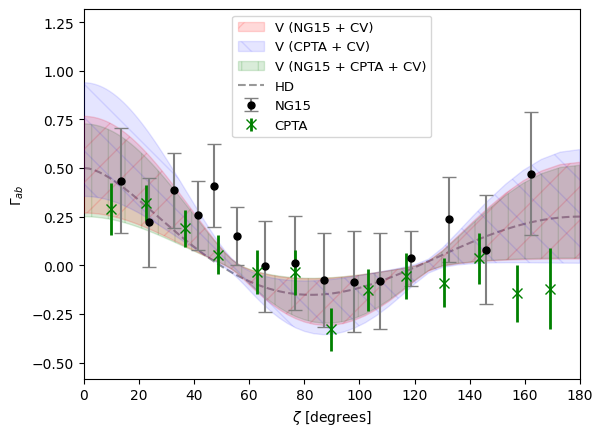

In [13]:
# mean ORFs for vector
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)
VectorBForf = Vector(lm = 10, v = stats4.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
Gab_VectorBF = VectorBForf['ORF']
Gab_VectorCV = np.sqrt(VectorBForf['CV'])

# CPTA results
VectorBForf_cpta = Vector(lm = 10, v = stats4_cpta.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
Gab_VectorBF_cpta = VectorBForf_cpta['ORF']
Gab_VectorCV_cpta = np.sqrt(VectorBForf_cpta['CV'])

# NG15 + CPTA results
VectorBForf_joint = Vector(lm = 10, v = stats4_joint.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
Gab_VectorBF_joint = VectorBForf_joint['ORF']
Gab_VectorCV_joint = np.sqrt(VectorBForf_joint['CV'])

# plot best fits
fig, ax = plt.subplots()
ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
            label = 'NG15', zorder = 10, \
            fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)

ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
            label = 'CPTA', zorder = 10, \
            fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)

# vector (NG15 + CV)
correlations_plot(Zeta, Gab_VectorBF, DGab_zz = Gab_VectorCV, lbl = r'V (NG15 + CV)', afrac = 100)

# vector (CPTA + CV)
correlations_plot(Zeta, Gab_VectorBF_cpta, DGab_zz = Gab_VectorCV_cpta, lbl = r'V (CPTA + CV)', \
                  clr = 'blue', hch = '\\', alf = 0.10, afrac = 100)

# vector (NG15 + CPTA + CV)
correlations_plot(Zeta, Gab_VectorBF_joint, DGab_zz = Gab_VectorCV_joint, lbl = r'V (NG15 + CPTA + CV)', \
                  clr = 'green', hch = '|', zo = 0, afrac = 100)

# HD curve
ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8, label = 'HD')

ax.set_xlim(0, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$\Gamma_{ab}$')
ax.legend(loc = 'upper center', prop = {'size': 9.5})
plt.show()

Interestingly we find that vector GW correlations fit quite well, contrary to our previous result with the NG 12 1/2 data. The reason is because the data now highlights the quadrupolar nature of the SGWB and a vector-natured SGWB also happens to be lead by a quadrupole.

We plot the individual constraints coming from each data set in the following block.

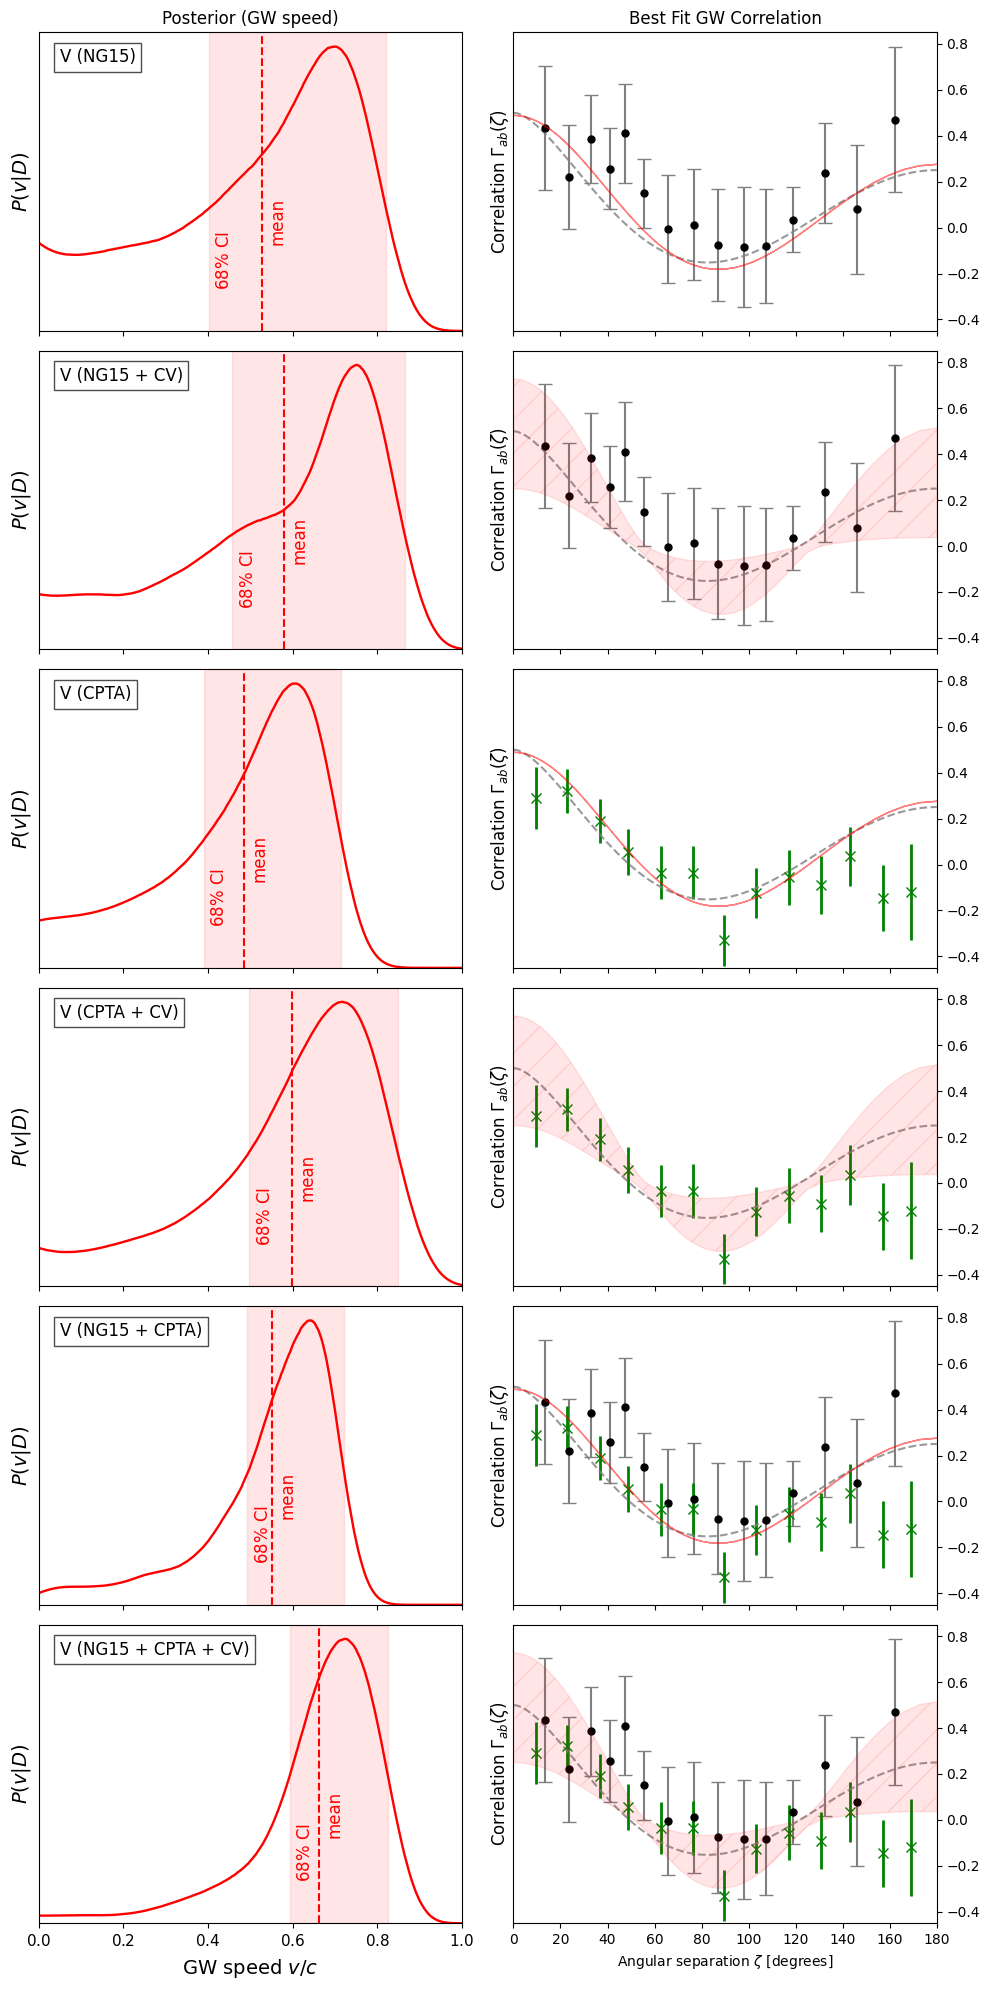

<Figure size 600x450 with 0 Axes>

In [14]:
# Create a figure and axes with 2 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 20), sharex='col')

# Hide x-axis labels for all but the bottom plot in the left column
for ax in axes[:-1, 0]:
    plt.setp(ax.get_xticklabels(), visible=False)

# Define the posterior plots (using placeholder axes for now)
gdplot = gdp.get_single_plotter()

posterior_plots = [gdsamps3, gdsamps4, gdsamps3_cpta, gdsamps4_cpta, \
                   gdsamps3_joint, gdsamps4_joint]
stats = [stats3, stats4, stats3_cpta, stats4_cpta, stats3_joint, stats4_joint]
legend_labels = ['V (NG15)', 'V (NG15 + CV)', 'V (CPTA)', 'V (CPTA + CV)', \
                 'V (NG15 + CPTA)', 'V (NG15 + CPTA + CV)']

# Plot each posterior plot on its corresponding axis in the left column
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 0]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='v', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('v').limits[0].lower, \
               statsi.parWithName('v').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.text(statsi.parWithName('v').limits[0].lower + 0.015, 0.15, r'$68\%$ CI', \
            fontsize=12, color='red', rotation=90, transform=ax.transAxes)
    
    ax.axvline(statsi.parWithName('v').mean, color = 'red', ls = '--')
    ax.text(statsi.parWithName('v').mean + 0.015, 0.3, r'mean', \
            fontsize=12, color='red', rotation=90, transform=ax.transAxes)
    ax.set_xlabel(None)
    ax.set_ylabel(r'$P(v|D)$')
    ax.set_xlim(0, 1)
    ax.text(0.05, 0.90, legend_labels[i], fontsize=12, \
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))

for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 1]  # Left column, same row as posterior plot index
    if i in [0, 1]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
    if i in [2, 3]:
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    if i in [4, 5]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
        
    BForf = Vector(lm = 10, v = statsi.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
    if i in [0, 2, 4]:
        correlations_plot(Zeta, BForf['ORF'], alf = 0.5, afrac = 100)
    elif i in [1, 3, 5]:
        correlations_plot(Zeta, BForf['ORF'], DGab_zz = np.sqrt(BForf['CV']), alf = 0.1, afrac = 100)
        
    ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8) # HD curve
    ax.set_xlim(0, 180)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("left")
    ax.yaxis.label.set_rotation(90)

    # Set the y-axis label on the right side
    ax.set_ylabel(r'Correlation $\Gamma_{ab}(\zeta)$')
    ax.yaxis.set_label_coords(-0.005, 0.5)
    ax.yaxis.label.set_size(12)
    ax.set_ylim(-0.45, 0.85)
    
# Add x-axis labels to the bottom plot in the left column
axes[-1, 0].set_xlabel(r'GW speed $v/c$')
axes[-1, 1].set_xlabel(r'Angular separation $\zeta$ [degrees]')  # right column

axes[0, 0].set_title(r'Posterior (GW speed)')
axes[0, 1].set_title(r'Best Fit GW Correlation')

# Manually adjust the height of the figure to reduce spacing between rows
fig.subplots_adjust(hspace=0.00, wspace=0.00)  # Then manually set the desired spacing between rows

fig.tight_layout()
plt.show()

### 4 HD + Galileon

Now that we have viewed both modes (tensor and vector) that produce quadrupolar correlations that can support the NG15 and CPTA observations, we consider now the possibility of a mixture of the HD and scalar field modes. This adds a quadrupole to the correlations but also consideres monopolar and dipolar correlations.

The statistical results for this interesting case are shown below.

In [15]:
ff5 = 'polyc/hdphi_NG15'
ff6 = 'polyc/hdphi_NG15CV' # with cosmic variance
ff5_cpta = 'polyc/hdphi_cpta'
ff6_cpta = 'polyc/hdphi_cptaCV' # with cosmic variance
ff5_joint = 'polyc/hdphi_joint'
ff6_joint = 'polyc/hdphi_jointCV' # with cosmic variance

gdsamps5 = loadMCSamples(os.path.abspath(ff5));
gdsamps6 = loadMCSamples(os.path.abspath(ff6));
gdsamps5_cpta = loadMCSamples(os.path.abspath(ff5_cpta));
gdsamps6_cpta = loadMCSamples(os.path.abspath(ff6_cpta));
gdsamps5_joint = loadMCSamples(os.path.abspath(ff5_joint));
gdsamps6_joint = loadMCSamples(os.path.abspath(ff6_joint));

stats5 = gdsamps5.getMargeStats();
stats6 = gdsamps6.getMargeStats();
stats5_cpta = gdsamps5_cpta.getMargeStats();
stats6_cpta = gdsamps6_cpta.getMargeStats();
stats5_joint = gdsamps5_joint.getMargeStats();
stats6_joint = gdsamps6_joint.getMargeStats();

/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdphi_NG15.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdphi_NG15CV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdphi_cpta.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdphi_cptaCV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdphi_joint.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdphi_jointCV.1.txt
Removed no burn in


Plot below shows constraints on the GW scalar to tensor ratio of the GWs in the SGWB. We comment that this is not the same as the scalar to tensor ratio associated with inflation models.

<Figure size 900x675 with 0 Axes>

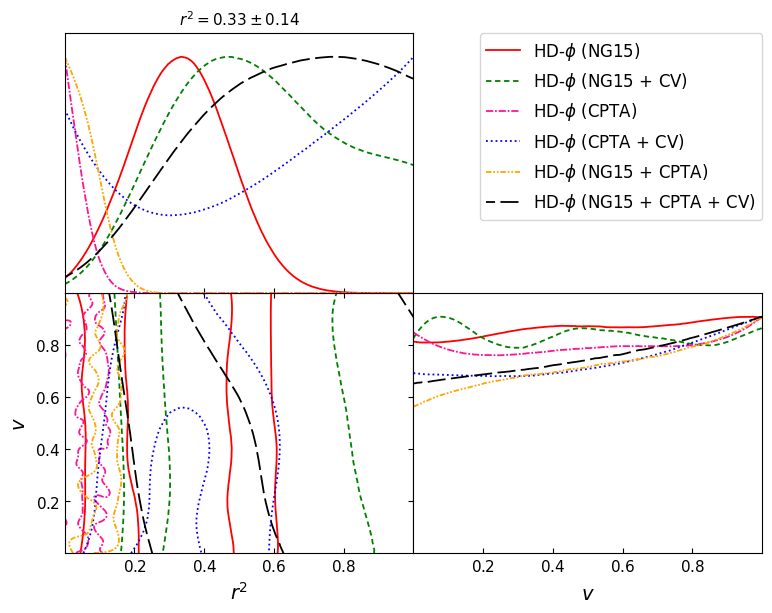

hdphi_NG15
log(B) = log(Z/Z_up) = 7.479339986493811 +/- 0.1289374282006696
best chi2 = 3.9353971

hdphi_NG15CV
log(B) = log(Z/Z_up) = 9.093240813545751 +/- 0.12001779580799152
best chi2 = 2.03697

hdphi_cpta
log(B) = log(Z/Z_up) = 2.6673506976003996 +/- 0.2342764772545715
best chi2 = 16.753437

hdphi_cptaCV
log(B) = log(Z/Z_up) = 8.90440358305112 +/- 0.19218640402102663
best chi2 = 8.8814213

hdphi_joint
log(B) = log(Z/Z_up) = 7.609246098008198 +/- 0.33809408609966746
best chi2 = 26.038978

hdphi_jointCV
log(B) = log(Z/Z_up) = 16.440774172693597 +/- 0.30411425419208504
best chi2 = 12.371421



In [16]:
gdplot = gdp.get_single_plotter(width_inch = 9)
gdplot.triangle_plot([gdsamps5, gdsamps6, gdsamps5_cpta, gdsamps6_cpta, \
                      gdsamps5_joint, gdsamps6_joint], \
                     ["r2", "v"], \
                     contour_ls = ['-', '--', '-.', ':', \
                                   (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))], \
                     contour_lws = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3], \
                     contour_colors = ['red', 'green', 'deeppink', 'blue', \
                                       'orange', 'black'], \
                     filled = False, \
                     title_limit = 1, \
                     legend_labels = [r'HD-$\phi$ (NG15)', r'HD-$\phi$ (NG15 + CV)', \
                                      r'HD-$\phi$ (CPTA)', r'HD-$\phi$ (CPTA + CV)', \
                                      r'HD-$\phi$ (NG15 + CPTA)', \
                                      r'HD-$\phi$ (NG15 + CPTA + CV)'], \
                     legend_loc = 'upper right', \
                     param_limits = {'r2': (0, 1), 'v': (0.001, 1)})
plt.show()

# print out Bayesian evidences
PrintLogBs(['hdphi_NG15', 'hdphi_NG15CV'], 'NG15')
PrintLogBs(['hdphi_cpta', 'hdphi_cptaCV'], 'CPTA')
PrintLogBs(['hdphi_joint', 'hdphi_jointCV'], 'joint')

The data so far is not able to constrain the properties of the scalar field, i.e., the speed of the scalar modes. We can nonetheless take a look at the correlations, particularly since the HD + $\phi$ model manifests a stronger fit than both the tensor and vector alone.

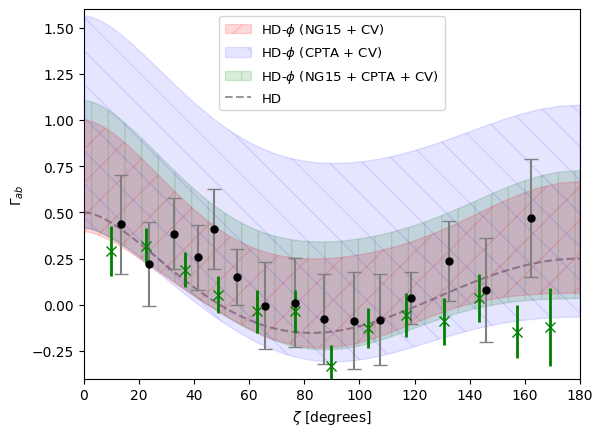

In [17]:
# mean ORFs for tensor and vector
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)
hdbest = hd.get_ORF(Zeta) # HD curve, fixed

# plot best fits
fig, ax = plt.subplots()

# data points # NG15 + CPTA
ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
            zorder = 10, fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
            zorder = 10, fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)

# NG15 mean fit
phibest = ORF_phi(Zeta, v = stats6.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
r2best = stats6.parWithName('r2').bestfit_sample
Gab_HDphiBF = hdbest['ORF'] + r2best*phibest['ORF']
Gab_HDphiCV = np.sqrt(hdbest['CV'] + (r2best**2)*phibest['CV'])

# HD/phi (NG15 + CV)
correlations_plot(Zeta, Gab_HDphiBF, DGab_zz = Gab_HDphiCV, lbl = r'HD-$\phi$ (NG15 + CV)', afrac = 100)

# CPTA mean fit
phibest_cpta = ORF_phi(Zeta, v = stats6_cpta.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
r2best_cpta = stats6_cpta.parWithName('r2').bestfit_sample
Gab_HDphiBF_cpta = hdbest['ORF'] + r2best_cpta*phibest_cpta['ORF']
Gab_HDphiCV_cpta = np.sqrt(hdbest['CV'] + (r2best_cpta**2)*phibest_cpta['CV'])

# HD/phi (CPTA + CV)
correlations_plot(Zeta, Gab_HDphiBF_cpta, DGab_zz = Gab_HDphiCV_cpta, lbl = r'HD-$\phi$ (CPTA + CV)', \
                  clr = 'blue', hch = '\\', alf = 0.10, afrac = 100)

# NG15 + CPTA mean fit
phibest_joint = ORF_phi(Zeta, v = stats6_joint.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
r2best_joint = stats6_joint.parWithName('r2').bestfit_sample
Gab_HDphiBF_joint = hdbest['ORF'] + r2best_joint*phibest_joint['ORF']
Gab_HDphiCV_joint = np.sqrt(hdbest['CV'] + (r2best_joint**2)*phibest_joint['CV'])

# HD/phi (NG15 + CPTA + CV)
correlations_plot(Zeta, Gab_HDphiBF_joint, DGab_zz = Gab_HDphiCV_joint, lbl = r'HD-$\phi$ (NG15 + CPTA + CV)', \
                  clr = 'green', hch = '|', zo = 0, afrac = 100)

# HD curve
ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8, label = 'HD')

ax.set_xlim(0, 180)
ax.set_ylim(-0.4, 1.6)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$\Gamma_{ab}$')
ax.legend(loc = 'upper center', prop = {'size': 9.5})
plt.show()

The plot explains why the HD + $\phi$ model fits so well. The $\phi$ adds a monopole that increases the cosmic variance of the total correlation such that the data points are now all in agreement with the model.

Below we plot the individual cases.

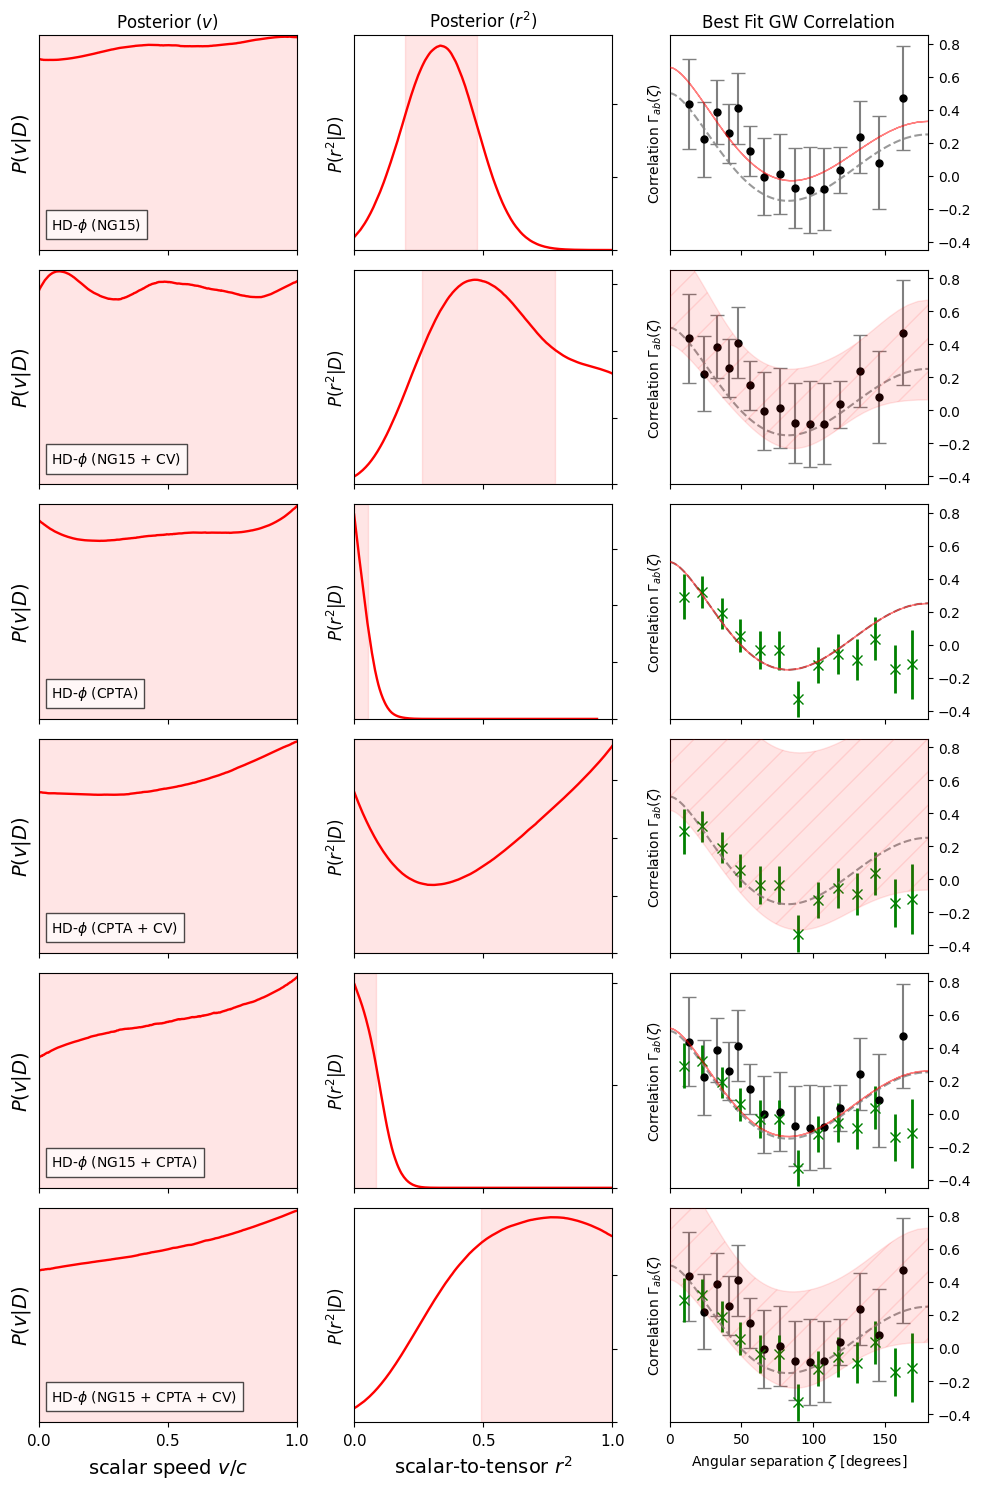

<Figure size 600x450 with 0 Axes>

In [18]:
# Create a figure and axes with 2 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 15), sharex='col')

# Hide x-axis labels for all but the bottom plot in the left column
for ax in axes[:-1, 0]:
    plt.setp(ax.get_xticklabels(), visible=False)

# Define the posterior plots (using placeholder axes for now)
gdplot = gdp.get_single_plotter()

posterior_plots = [gdsamps5, gdsamps6, gdsamps5_cpta, gdsamps6_cpta, \
                   gdsamps5_joint, gdsamps6_joint]
stats = [stats5, stats6, stats5_cpta, stats6_cpta, stats5_joint, stats6_joint]
legend_labels = [r'HD-$\phi$ (NG15)', r'HD-$\phi$ (NG15 + CV)', \
                 r'HD-$\phi$ (CPTA)', r'HD-$\phi$ (CPTA + CV)', \
                 r'HD-$\phi$ (NG15 + CPTA)', r'HD-$\phi$ (NG15 + CPTA + CV)']

# Plot each posterior plot on its corresponding axis in the left column
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 0]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='v', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('v').limits[0].lower, \
               statsi.parWithName('v').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.set_xlabel(None)
    ax.set_ylabel(r'$P(v|D)$')
    ax.set_xlim(0, 1)
    ax.text(0.05, 0.10, legend_labels[i], fontsize=10, \
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 1]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='r2', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('r2').limits[0].lower, \
               statsi.parWithName('r2').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.set_xlabel(None)
    ax.set_xlim(0, 1)
    
    ax.yaxis.tick_right()

    # Set the y-axis label on the right side
    ax.set_ylabel(r'$P(r^2|D)$')
    # ax.yaxis.set_label_coords(1.10, 0.5)
    ax.yaxis.label.set_size(12)

for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 2]  # Left column, same row as posterior plot index
    if i in [0, 1]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
    if i in [2, 3]:
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    if i in [4, 5]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    
    statsi = stats[i]
    phii = ORF_phi(Zeta, v = statsi.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
    r2i = statsi.parWithName('r2').bestfit_sample
    HDphiBF = hdbest['ORF'] + r2i*phii['ORF']
    HDphiCV = hdbest['CV'] + (r2i**2)*phii['CV']
    
    if i in [0, 2, 4]:
        correlations_plot(Zeta, HDphiBF, alf = 0.5, afrac = 100)
    elif i in [1, 3, 5]:
        correlations_plot(Zeta, HDphiBF, DGab_zz = np.sqrt(HDphiCV), \
                          hch = '/', alf = 0.1, afrac = 100)
        
    ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8) # HD curve
    ax.set_xlim(0, 180)
    ax.yaxis.tick_right()

    # Set the y-axis label on the right side
    ax.set_ylabel(r'Correlation $\Gamma_{ab}(\zeta)$')
    # ax.yaxis.set_label_coords(1.25, 0.5)
    # ax.yaxis.label.set_size(12)
    ax.set_ylim(-0.45, 0.85)
    
# Add x-axis labels to the bottom plot in the left column
axes[-1, 0].set_xlabel(r'scalar speed $v/c$')
axes[-1, 1].set_xlabel(r'scalar-to-tensor $r^2$')
axes[-1, 2].set_xlabel(r'Angular separation $\zeta$ [degrees]')  # right column

axes[0, 0].set_title(r'Posterior ($v$)')
axes[0, 1].set_title(r'Posterior ($r^2$)')
axes[0, 2].set_title(r'Best Fit GW Correlation')

# Manually adjust the height of the figure to reduce spacing between rows
fig.subplots_adjust(hspace=0.00, wspace=0.00)  # Then manually set the desired spacing between rows

fig.tight_layout()
plt.show()

### 5 HD + Vector

Here we further give HD + subluminal vectors a consideration, same as we did with the scalar modes. The results of the sampling are imported below.

In [19]:
ff7 = 'polyc/hdV_NG15'
ff8 = 'polyc/hdV_NG15CV' # with cosmic variance
ff7_cpta = 'polyc/hdV_cpta'
ff8_cpta = 'polyc/hdV_cptaCV' # with cosmic variance
ff7_joint = 'polyc/hdV_joint'
ff8_joint = 'polyc/hdV_jointCV' # with cosmic variance

gdsamps7 = loadMCSamples(os.path.abspath(ff7));
gdsamps8 = loadMCSamples(os.path.abspath(ff8));
gdsamps7_cpta = loadMCSamples(os.path.abspath(ff7_cpta));
gdsamps8_cpta = loadMCSamples(os.path.abspath(ff8_cpta));
gdsamps7_joint = loadMCSamples(os.path.abspath(ff7_joint));
gdsamps8_joint = loadMCSamples(os.path.abspath(ff8_joint));

stats7 = gdsamps7.getMargeStats();
stats8 = gdsamps8.getMargeStats();
stats7_cpta = gdsamps7_cpta.getMargeStats();
stats8_cpta = gdsamps8_cpta.getMargeStats();
stats7_joint = gdsamps7_joint.getMargeStats();
stats8_joint = gdsamps8_joint.getMargeStats();

/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdV_NG15.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdV_NG15CV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdV_cpta.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdV_cptaCV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdV_joint.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/hdV_jointCV.1.txt
Removed no burn in


Now here are the constraints on the GW vector to tensor ratio parameter.

<Figure size 900x675 with 0 Axes>

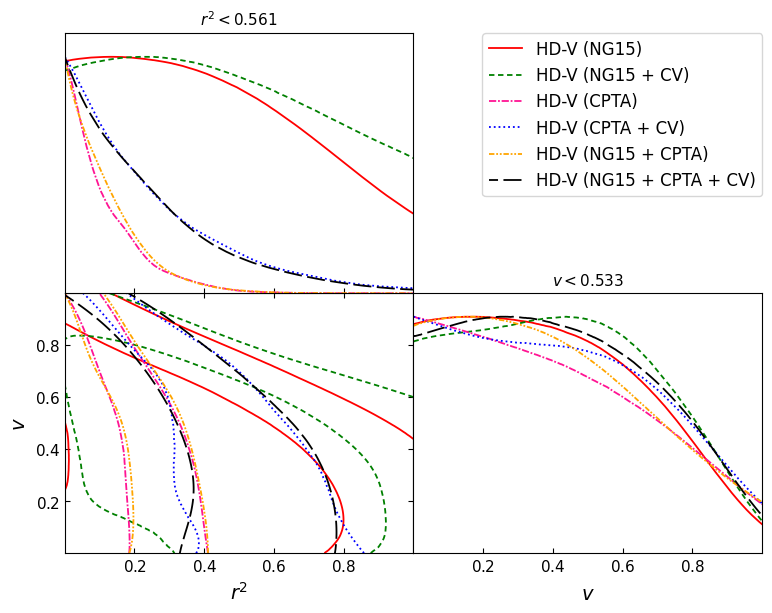

hdV_NG15
log(B) = log(Z/Z_up) = 5.641029862713391 +/- 0.12086769488616896
best chi2 = 8.1348569

hdV_NG15CV
log(B) = log(Z/Z_up) = 6.147001237068951 +/- 0.11938443888434869
best chi2 = 8.040016

hdV_cpta
log(B) = log(Z/Z_up) = 3.5111291091004997 +/- 0.2166216489801006
best chi2 = 16.759882

hdV_cptaCV
log(B) = log(Z/Z_up) = 7.949405683520119 +/- 0.20397135921519322
best chi2 = 9.298888

hdV_joint
log(B) = log(Z/Z_up) = 7.941577641373998 +/- 0.3258127544176433
best chi2 = 26.310527

hdV_jointCV
log(B) = log(Z/Z_up) = 12.797071335749898 +/- 0.31432678094191946
best chi2 = 18.00949



In [20]:
gdplot = gdp.get_single_plotter(width_inch = 9)
gdplot.triangle_plot([gdsamps7, gdsamps8, gdsamps7_cpta, gdsamps8_cpta, \
                      gdsamps7_joint, gdsamps8_joint], \
                     ["r2", "v"], \
                     contour_ls = ['-', '--', '-.', ':', \
                                   (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))], \
                     contour_lws = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3], \
                     contour_colors = ['red', 'green', 'deeppink', 'blue', \
                                       'orange', 'black'], \
                     filled = False, \
                     title_limit = 1, \
                     legend_labels = [r'HD-V (NG15)', r'HD-V (NG15 + CV)', \
                                      r'HD-V (CPTA)', r'HD-V (CPTA + CV)', \
                                      r'HD-V (NG15 + CPTA)', \
                                      r'HD-V (NG15 + CPTA + CV)'], \
                     legend_loc = 'upper right', \
                     param_limits = {'r2': (0, 1), 'v': (0.001, 1)})
plt.show()

# print out Bayesian evidences
PrintLogBs(['hdV_NG15', 'hdV_NG15CV'], 'NG15')
PrintLogBs(['hdV_cpta', 'hdV_cptaCV'], 'CPTA')
PrintLogBs(['hdV_joint', 'hdV_jointCV'], 'joint')

We see that in contrast with the scalar modes, the parameter space of the vector modes can be constrained quite well by the data. The constraint on the vector-to-tensor ratio leads to an upper bound. The evidence however is not an improvement to the quadrupolar tensor correlations.

The best fit correlation curves are shown below in the next line.

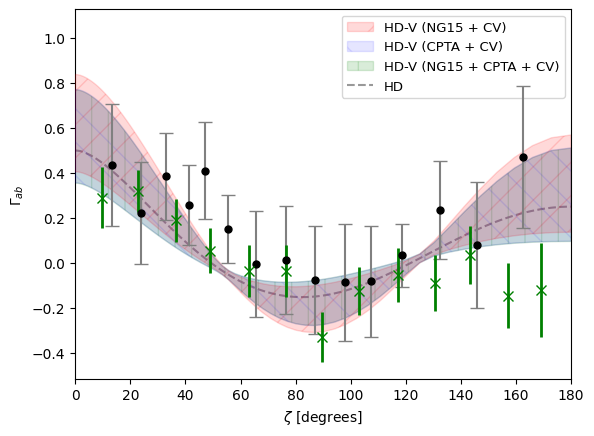

In [21]:
# mean ORFs for HD + vector
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)
hdbest = hd.get_ORF(Zeta)

# plot best fits
fig, ax = plt.subplots()

# data points
ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
            zorder = 10, fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
            zorder = 10, fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)

# NG15
Vbest = Vector(lm = 10, v = stats8.parWithName('v').mean, fD = 500).get_ORF(Zeta)
r2best = stats8.parWithName('r2').mean
Gab_HDVBF = hdbest['ORF'] + r2best*Vbest['ORF']
Gab_HDVCV = np.sqrt(hdbest['CV'] + (r2best**2)*Vbest['CV'])

# HD/V (NG15 + CV)
correlations_plot(Zeta, Gab_HDVBF, DGab_zz = Gab_HDVCV, lbl = r'HD-V (NG15 + CV)', afrac = 100)

# CPTA
Vbest_cpta = Vector(lm = 10, v = stats8_cpta.parWithName('v').mean, fD = 500).get_ORF(Zeta)
r2best_cpta = stats8_cpta.parWithName('r2').mean
Gab_HDVBF_cpta = hdbest['ORF'] + r2best_cpta*Vbest_cpta['ORF']
Gab_HDVCV_cpta = np.sqrt(hdbest['CV'] + (r2best_cpta**2)*Vbest_cpta['CV'])

# HD/V (CPTA + CV)
correlations_plot(Zeta, Gab_HDVBF_cpta, DGab_zz = Gab_HDVCV_cpta, lbl = r'HD-V (CPTA + CV)', \
                  clr = 'blue', hch = '\\', alf = 0.10, afrac = 100)

# NG15 + CPTA
Vbest_joint = Vector(lm = 10, v = stats8_joint.parWithName('v').mean, fD = 500).get_ORF(Zeta)
r2best_joint = stats8_joint.parWithName('r2').mean
Gab_HDVBF_joint = hdbest['ORF'] + r2best_joint*Vbest_joint['ORF']
Gab_HDVCV_joint = np.sqrt(hdbest['CV'] + (r2best_joint**2)*Vbest_joint['CV'])

# HD/V (NG15 + CPTA + CV)
correlations_plot(Zeta, Gab_HDVBF_joint, DGab_zz = Gab_HDVCV_joint, lbl = r'HD-V (NG15 + CPTA + CV)', \
                  clr = 'green', hch = '|', zo = 0, afrac = 100)

# HD curve
ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8, label = 'HD')

ax.set_xlim(0, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$\Gamma_{ab}$')
ax.legend(loc = 'upper right', prop = {'size': 9.5})
plt.show()

Below we plot the individual cases.

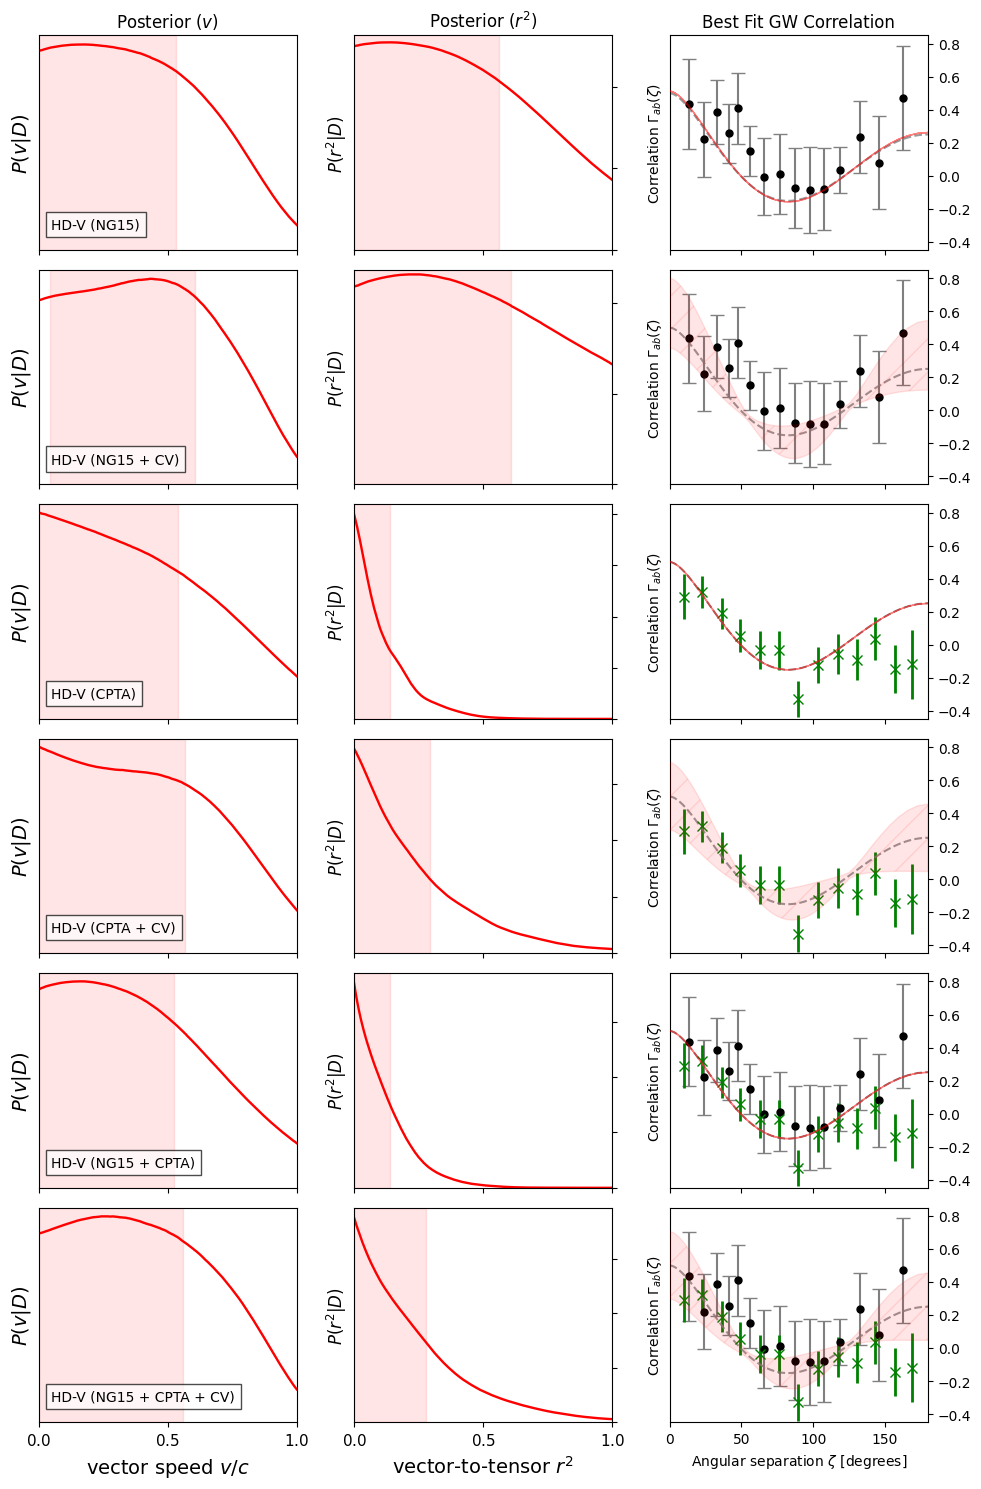

<Figure size 600x450 with 0 Axes>

In [22]:
# Create a figure and axes with 2 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 15), sharex='col')

# Hide x-axis labels for all but the bottom plot in the left column
for ax in axes[:-1, 0]:
    plt.setp(ax.get_xticklabels(), visible=False)

# Define the posterior plots (using placeholder axes for now)
gdplot = gdp.get_single_plotter()

posterior_plots = [gdsamps7, gdsamps8, gdsamps7_cpta, gdsamps8_cpta, \
                   gdsamps7_joint, gdsamps8_joint]
stats = [stats7, stats8, stats7_cpta, stats8_cpta, stats7_joint, stats8_joint]
legend_labels = [r'HD-V (NG15)', r'HD-V (NG15 + CV)', \
                 r'HD-V (CPTA)', r'HD-V (CPTA + CV)', \
                 r'HD-V (NG15 + CPTA)', r'HD-V (NG15 + CPTA + CV)']

# Plot each posterior plot on its corresponding axis in the left column
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 0]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='v', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('v').limits[0].lower, \
               statsi.parWithName('v').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.set_xlabel(None)
    ax.set_ylabel(r'$P(v|D)$')
    ax.set_xlim(0, 1)
    ax.text(0.05, 0.10, legend_labels[i], fontsize=10, \
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 1]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='r2', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('r2').limits[0].lower, \
               statsi.parWithName('r2').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.set_xlabel(None)
    ax.set_xlim(0, 1)
    
    ax.yaxis.tick_right()

    # Set the y-axis label on the right side
    ax.set_ylabel(r'$P(r^2|D)$')
    # ax.yaxis.set_label_coords(1.10, 0.5)
    ax.yaxis.label.set_size(12)

for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 2]  # Left column, same row as posterior plot index
    if i in [0, 1]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
    if i in [2, 3]:
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    if i in [4, 5]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    
    statsi = stats[i]
    Vi = Vector(lm = 10, v = statsi.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
    r2i = statsi.parWithName('r2').bestfit_sample
    HDVBF = hdbest['ORF'] + r2i*Vi['ORF']
    HDVCV = hdbest['CV'] + (r2i**2)*Vi['CV']
    
    if i in [0, 2, 4]:
        correlations_plot(Zeta, HDVBF, alf = 0.5, afrac = 100)
    elif i in [1, 3, 5]:
        correlations_plot(Zeta, HDVBF, DGab_zz = np.sqrt(HDVCV), \
                          hch = '/', alf = 0.1, afrac = 100)
        
    ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8) # HD curve
    ax.set_xlim(0, 180)
    ax.yaxis.tick_right()

    ax.set_ylabel(r'Correlation $\Gamma_{ab}(\zeta)$')
    ax.set_ylim(-0.45, 0.85)
    
# Add x-axis labels to the bottom plot in the left column
axes[-1, 0].set_xlabel(r'vector speed $v/c$')
axes[-1, 1].set_xlabel(r'vector-to-tensor $r^2$')
axes[-1, 2].set_xlabel(r'Angular separation $\zeta$ [degrees]')  # right column

axes[0, 0].set_title(r'Posterior ($v$)')
axes[0, 1].set_title(r'Posterior ($r^2$)')
axes[0, 2].set_title(r'Best Fit GW Correlation')

# Manually adjust the height of the figure to reduce spacing between rows
fig.subplots_adjust(hspace=0.00, wspace=0.00)  # Then manually set the desired spacing between rows

# Adjust layout to prevent overlapping of titles and labels
fig.tight_layout()
plt.show()

### 6 Tensor + Scalar

Lastly we present the results for the subluminal tensor and scalar GWs in the SGWB---tensor and scalar modes have the same speed. We import the results of the nested sampling below.

In [23]:
ff9 = 'polyc/Tphi_NG15'
ff10 = 'polyc/Tphi_NG15CV' # with cosmic variance
ff9_cpta = 'polyc/Tphi_cpta'
ff10_cpta = 'polyc/Tphi_cptaCV' # with cosmic variance
ff9_joint = 'polyc/Tphi_joint'
ff10_joint = 'polyc/Tphi_jointCV' # with cosmic variance

gdsamps9 = loadMCSamples(os.path.abspath(ff9));
gdsamps10 = loadMCSamples(os.path.abspath(ff10));
gdsamps9_cpta = loadMCSamples(os.path.abspath(ff9_cpta));
gdsamps10_cpta = loadMCSamples(os.path.abspath(ff10_cpta));
gdsamps9_joint = loadMCSamples(os.path.abspath(ff9_joint));
gdsamps10_joint = loadMCSamples(os.path.abspath(ff10_joint));

stats9 = gdsamps9.getMargeStats();
stats10 = gdsamps10.getMargeStats();
stats9_cpta = gdsamps9_cpta.getMargeStats();
stats10_cpta = gdsamps10_cpta.getMargeStats();
stats9_joint = gdsamps9_joint.getMargeStats();
stats10_joint = gdsamps10_joint.getMargeStats();

/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/Tphi_NG15.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/Tphi_NG15CV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/Tphi_cpta.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/Tphi_cptaCV.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/Tphi_joint.1.txt
Removed no burn in
/home/rbernardo/repos/PTAfast/app4_noneinsteiniangws/polyc/Tphi_jointCV.1.txt
Removed no burn in


The contour maps in the sampled parameter space are shown for each cases below. This overlaps their posteriors for comparison.

<Figure size 900x675 with 0 Axes>

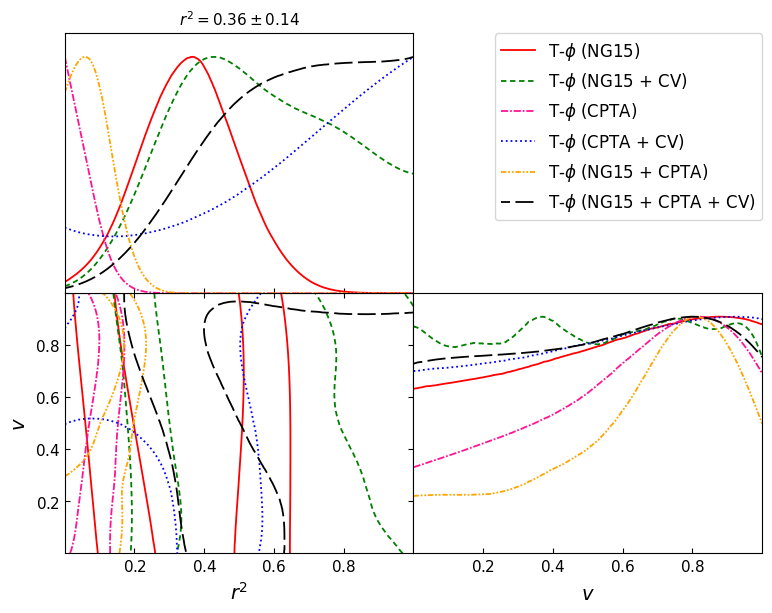

Tphi_NG15
log(B) = log(Z/Z_up) = 7.745935097644681 +/- 0.1294041331867315
best chi2 = 3.1783896

Tphi_NG15CV
log(B) = log(Z/Z_up) = 9.20171972091337 +/- 0.1204027560707925
best chi2 = 1.6973764

Tphi_cpta
log(B) = log(Z/Z_up) = 3.4883957546174997 +/- 0.229923591488216
best chi2 = 14.846275

Tphi_cptaCV
log(B) = log(Z/Z_up) = 9.117408232805499 +/- 0.1946081243528781
best chi2 = 7.47721

Tphi_joint
log(B) = log(Z/Z_up) = 8.789704514325798 +/- 0.33479218452958437
best chi2 = 23.298251

Tphi_jointCV
log(B) = log(Z/Z_up) = 16.859978769073567 +/- 0.30616966325934825
best chi2 = 11.242362



In [24]:
gdplot = gdp.get_single_plotter(width_inch = 9)
gdplot.triangle_plot([gdsamps9, gdsamps10, gdsamps9_cpta, gdsamps10_cpta, \
                      gdsamps9_joint, gdsamps10_joint], \
                     ["r2", "v"], \
                     contour_ls = ['-', '--', '-.', ':', \
                                   (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))], \
                     contour_lws = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3], \
                     contour_colors = ['red', 'green', 'deeppink', 'blue', \
                                       'orange', 'black'], \
                     filled = False, \
                     title_limit = 1, \
                     legend_labels = [r'T-$\phi$ (NG15)', r'T-$\phi$ (NG15 + CV)', \
                                      r'T-$\phi$ (CPTA)', r'T-$\phi$ (CPTA + CV)', \
                                      r'T-$\phi$ (NG15 + CPTA)', \
                                      r'T-$\phi$ (NG15 + CPTA + CV)'], \
                     legend_loc = 'upper right', \
                     param_limits = {'r2': (0, 1), 'v': (0.001, 1)})
plt.show()

# print out Bayesian evidences
PrintLogBs(['Tphi_NG15', 'Tphi_NG15CV'], 'NG15')
PrintLogBs(['Tphi_cpta', 'Tphi_cptaCV'], 'CPTA')
PrintLogBs(['Tphi_joint', 'Tphi_jointCV'], 'joint')

We show the best fit curves for the CV cases in the next block.

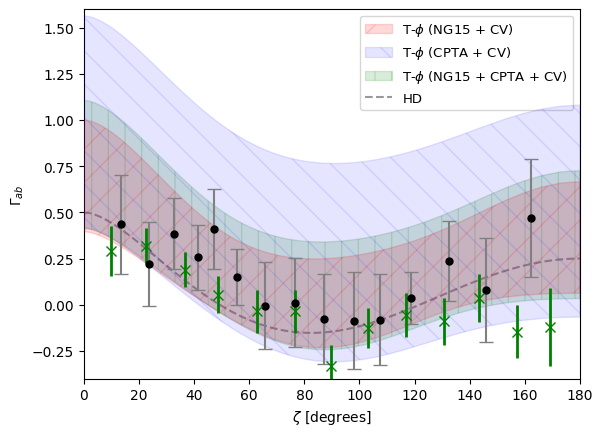

In [25]:
# mean ORFs for tensor and vector
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)

# plot best fits
fig, ax = plt.subplots()

# data points
ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
            zorder = 10, fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
            zorder = 10, fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)

# NG15 mean fit
phibest = ORF_phi(Zeta, v = stats10.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
Tbest = Tensor(lm = 10, v = stats10.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
r2best = stats10.parWithName('r2').bestfit_sample
Gab_TphiBF = Tbest['ORF'] + r2best*phibest['ORF']
Gab_TphiCV = np.sqrt(Tbest['CV'] + (r2best**2)*phibest['CV'])

# T-phi (NG15 + CV)
correlations_plot(Zeta, Gab_HDphiBF, DGab_zz = Gab_HDphiCV, lbl = r'T-$\phi$ (NG15 + CV)', afrac = 100)

# CPTA mean fit
phibest_cpta = ORF_phi(Zeta, v = stats10_cpta.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
Tbest_cpta = Tensor(lm = 10, v = stats10_cpta.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
r2best_cpta = stats10_cpta.parWithName('r2').bestfit_sample
Gab_TphiBF_cpta = Tbest_cpta['ORF'] + r2best_cpta*phibest_cpta['ORF']
Gab_TphiCV_cpta = np.sqrt(Tbest_cpta['CV'] + (r2best_cpta**2)*phibest_cpta['CV'])

# T-phi (CPTA + CV)
correlations_plot(Zeta, Gab_HDphiBF_cpta, DGab_zz = Gab_HDphiCV_cpta, lbl = r'T-$\phi$ (CPTA + CV)', \
                  clr = 'blue', hch = '\\', alf = 0.10, afrac = 100)

# NG15 + CPTA mean fit
phibest_joint = ORF_phi(Zeta, v = stats10_joint.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
Tbest_joint = Tensor(lm = 10, v = stats10_joint.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
r2best_joint = stats10_joint.parWithName('r2').bestfit_sample
Gab_TphiBF_joint = Tbest_joint['ORF'] + r2best_joint*phibest_joint['ORF']
Gab_TphiCV_joint = np.sqrt(Tbest_joint['CV'] + (r2best_joint**2)*phibest_joint['CV'])

# HD/phi (NG15 + CPTA + CV)
correlations_plot(Zeta, Gab_HDphiBF_joint, DGab_zz = Gab_HDphiCV_joint, lbl = r'T-$\phi$ (NG15 + CPTA + CV)', \
                  clr = 'green', hch = '|', zo = 0, afrac = 100)

# HD curve
ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8, label = 'HD')

ax.set_xlim(0, 180)
ax.set_ylim(-0.4, 1.6)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$\Gamma_{ab}$')
ax.legend(loc = 'upper right', prop = {'size': 9.5})
plt.show()

To end below we plot the different cases individually.

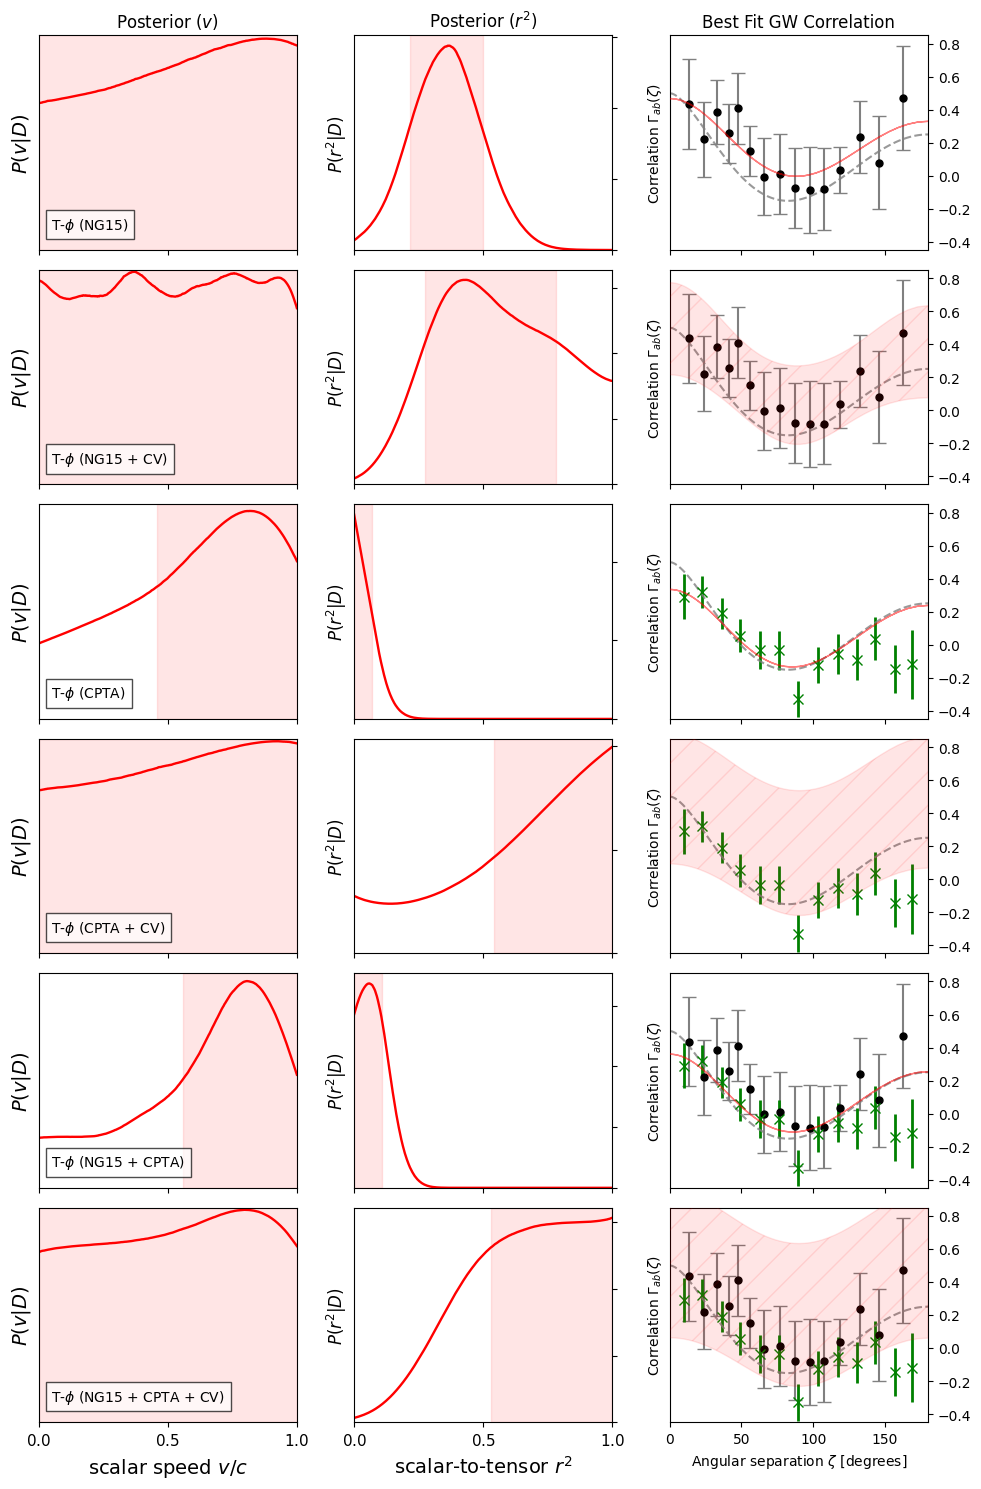

<Figure size 600x450 with 0 Axes>

In [26]:
# Create a figure and axes with 2 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 15), sharex='col')

# Hide x-axis labels for all but the bottom plot in the left column
for ax in axes[:-1, 0]:
    plt.setp(ax.get_xticklabels(), visible=False)

# Define the posterior plots (using placeholder axes for now)
gdplot = gdp.get_single_plotter()

posterior_plots = [gdsamps9, gdsamps10, gdsamps9_cpta, gdsamps10_cpta, \
                   gdsamps9_joint, gdsamps10_joint]
stats = [stats9, stats10, stats9_cpta, stats10_cpta, stats9_joint, stats10_joint]
legend_labels = [r'T-$\phi$ (NG15)', r'T-$\phi$ (NG15 + CV)', \
                 r'T-$\phi$ (CPTA)', r'T-$\phi$ (CPTA + CV)', \
                 r'T-$\phi$ (NG15 + CPTA)', r'T-$\phi$ (NG15 + CPTA + CV)']

# Plot each posterior plot on its corresponding axis in the left column
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 0]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='v', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('v').limits[0].lower, \
               statsi.parWithName('v').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.set_xlabel(None)
    ax.set_ylabel(r'$P(v|D)$')
    ax.set_xlim(0, 1)
    ax.text(0.05, 0.10, legend_labels[i], fontsize=10, \
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    
for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 1]  # Left column, same row as posterior plot index
    gdplot.plot_1d([posterior_plot], param='r2', colors=['red'], ax=ax, \
                   ls='-', lw=1.3, normalized = True)
    statsi = stats[i]
    ax.axvspan(statsi.parWithName('r2').limits[0].lower, \
               statsi.parWithName('r2').limits[0].upper, \
               alpha = 0.1, color = 'red')
    ax.set_xlabel(None)
    ax.set_xlim(0, 1)
    
    ax.yaxis.tick_right()

    ax.set_ylabel(r'$P(r^2|D)$')
    ax.yaxis.label.set_size(12)

for i, posterior_plot in enumerate(posterior_plots):
    ax = axes[i, 2]  # Left column, same row as posterior plot index
    if i in [0, 1]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
    if i in [2, 3]:
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    if i in [4, 5]:
        ax.errorbar(zab_Deg, Gab_NG15, yerr = DGab_NG15, \
                    fmt = 'k.', markersize = 10, ecolor = 'gray', elinewidth = 1.5, capsize = 5)
        ax.errorbar(Zab_Deg, Gab_cpta, yerr = DGab_cpta, \
                    fmt = 'gx', markersize = 7, ecolor = 'green', elinewidth = 2, capsize = 0)
    
    statsi = stats[i]
    phii = ORF_phi(Zeta, v = statsi.parWithName('v').bestfit_sample, fD = 500, get_cv = True)
    Tbesti = Tensor(lm = 10, v = statsi.parWithName('v').bestfit_sample, fD = 500).get_ORF(Zeta)
    r2i = statsi.parWithName('r2').bestfit_sample
    TphiBF = Tbesti['ORF'] + r2i*phii['ORF']
    TphiCV = Tbesti['CV'] + (r2i**2)*phii['CV']
    
    if i in [0, 2, 4]:
        correlations_plot(Zeta, TphiBF, alf = 0.5, afrac = 100)
    elif i in [1, 3, 5]:
        correlations_plot(Zeta, TphiBF, DGab_zz = np.sqrt(TphiCV), \
                          hch = '/', alf = 0.1, afrac = 100)
        
    ax.plot(zta*180/np.pi, hdcurve, color = 'gray', ls = '--', alpha = 0.8) # HD curve
    ax.set_xlim(0, 180)
    ax.yaxis.tick_right()

    # Set the y-axis label on the right side
    ax.set_ylabel(r'Correlation $\Gamma_{ab}(\zeta)$')
    # ax.yaxis.set_label_coords(1.25, 0.5)
    # ax.yaxis.label.set_size(12)
    ax.set_ylim(-0.45, 0.85)
    
# Add x-axis labels to the bottom plot in the left column
axes[-1, 0].set_xlabel(r'scalar speed $v/c$')
axes[-1, 1].set_xlabel(r'scalar-to-tensor $r^2$')
axes[-1, 2].set_xlabel(r'Angular separation $\zeta$ [degrees]')  # right column

axes[0, 0].set_title(r'Posterior ($v$)')
axes[0, 1].set_title(r'Posterior ($r^2$)')
axes[0, 2].set_title(r'Best Fit GW Correlation')

# Manually adjust the height of the figure to reduce spacing between rows
fig.subplots_adjust(hspace=0.00, wspace=0.00)  # Then manually set the desired spacing between rows

# Adjust layout to prevent overlapping of titles and labels
fig.tight_layout()
plt.show()

### End of notebook